In [6]:
import requests
import os
import time

import pandas as pd

from urllib.parse import urlencode
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

In [2]:
params = {
    'email': 'kyle.shores44@gmail.com',
    'key': 'greenhare83',
}
r=requests.get(f"https://aqs.epa.gov/data/api/list/states?{urlencode(params)}")
states_data = r.json()['Data']
states_df = pd.DataFrame.from_dict(states_data)

In [16]:
params = {
    'email': 'kyle.shores44@gmail.com',
    'key': 'greenhare83',
    'param': '88101',
    'bdate': f'20210101',
    'edate': f'20211231'
}

bar = tqdm(states_df.iterrows())
for idx, row in bar:
    state_code, state_name = row['code'], row['value_represented'].replace(' ', '_')
    bar.set_description(state_name)
    path = f'data/PM/{state_name}.csv'
    try:
        params['state'] = state_code
        r=requests.get(f"https://aqs.epa.gov/data/api/sampleData/byState?{urlencode(params)}")
        data = r.json()['Data']
        df = pd.DataFrame.from_dict(data)
        df = df[[
            'latitude', 'longitude',
            'date_gmt', 'time_gmt',
            'sample_measurement', 'units_of_measure', 
            'poc', "sample_frequency"
        ]]
        df['time'] = pd.to_datetime(df['date_gmt'] + ' ' + df['time_gmt']).dt.tz_localize('UTC')
        df.drop(['date_gmt', 'time_gmt'], axis=1, inplace=True)
        df.to_csv(path)
    except Exception as e:
        print(state_name, r.status_code)
        print(e)
    time.sleep(10)

0it [00:00, ?it/s]

California 200
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Guam 200
"None of [Index(['latitude', 'longitude', 'date_gmt', 'time_gmt', 'sample_measurement',\n       'units_of_measure', 'poc', 'sample_frequency'],\n      dtype='object')] are in the [columns]"
Canada 400
'Data'


In [31]:
cali_code = states_df[states_df.value_represented == 'California'].code.item()
params['state'] = cali_code
params['bdate'] = '20210101'
params['edate'] = '20210630'
r=requests.get(f"https://aqs.epa.gov/data/api/sampleData/byState?{urlencode(params)}")
data = r.json()['Data']
df = pd.DataFrame.from_dict(data)
df = df[[
    'latitude', 'longitude',
    'date_gmt', 'time_gmt',
    'sample_measurement', 'units_of_measure', 
    'poc', "sample_frequency"
]]
df['time'] = pd.to_datetime(df['date_gmt'] + ' ' + df['time_gmt']).dt.tz_localize('UTC')
df.drop(['date_gmt', 'time_gmt'], axis=1, inplace=True)

In [32]:
cali1 = df.copy()

In [35]:
params['bdate'] = '20210701'
params['edate'] = '20210930'
r=requests.get(f"https://aqs.epa.gov/data/api/sampleData/byState?{urlencode(params)}")
data = r.json()['Data']
df = pd.DataFrame.from_dict(data)
df = df[[
    'latitude', 'longitude',
    'date_gmt', 'time_gmt',
    'sample_measurement', 'units_of_measure', 
    'poc', "sample_frequency"
]]
df['time'] = pd.to_datetime(df['date_gmt'] + ' ' + df['time_gmt']).dt.tz_localize('UTC')
df.drop(['date_gmt', 'time_gmt'], axis=1, inplace=True)

In [36]:
cali2 = df.copy()

In [37]:
params['bdate'] = '20211001'
params['edate'] = '20211231'
r=requests.get(f"https://aqs.epa.gov/data/api/sampleData/byState?{urlencode(params)}")
data = r.json()['Data']
df = pd.DataFrame.from_dict(data)
df = df[[
    'latitude', 'longitude',
    'date_gmt', 'time_gmt',
    'sample_measurement', 'units_of_measure', 
    'poc', "sample_frequency"
]]
df['time'] = pd.to_datetime(df['date_gmt'] + ' ' + df['time_gmt']).dt.tz_localize('UTC')
df.drop(['date_gmt', 'time_gmt'], axis=1, inplace=True)

In [38]:
cali3 = df.copy()

In [39]:
cali1

latitude   longitude  sample_measurement  \
0       35.046528 -118.162833                 1.5   
1       35.046528 -118.162833                 0.4   
2       35.046528 -118.162833                 0.0   
3       35.046528 -118.162833                -1.0   
4       35.046528 -118.162833                -0.4   
...           ...         ...                 ...   
440507  32.710177 -117.142665                 8.9   
440508  32.710177 -117.142665                 8.0   
440509  32.710177 -117.142665                 3.5   
440510  32.710177 -117.142665                 9.0   
440511  32.710177 -117.142665                 5.5   

                   units_of_measure  poc sample_frequency  \
0       Micrograms/cubic meter (LC)    3           HOURLY   
1       Micrograms/cubic meter (LC)    3           HOURLY   
2       Micrograms/cubic meter (LC)    3           HOURLY   
3       Micrograms/cubic meter (LC)    3           HOURLY   
4       Micrograms/cubic meter (LC)    3           HOURLY   
...                             ...  ...              ...   
440507  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
440508  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
440509  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
440510  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
440511  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   

                            time  
0      2021-01-01 08:00:00+00:00  
1      2021-01-01 09:00:00+00:00  
2      2021-01-01 10:00:00+00:00  
3      2021-01-01 11:00:00+00:00  
4      2021-01-01 12:00:00+00:00  
...                          ...  
440507 2021-06-18 08:00:00+00:00  
440508 2021-06-21 08:00:00+00:00  
440509 2021-06-24 08:00:00+00:00  
440510 2021-06-27 08:00:00+00:00  
440511 2021-06-30 08:00:00+00:00  

[440512 rows x 7 columns]

In [40]:
cali2

latitude   longitude  sample_measurement  \
0       35.046528 -118.162833                 8.7   
1       35.046528 -118.162833                 6.8   
2       35.046528 -118.162833                 7.7   
3       35.046528 -118.162833                10.5   
4       35.046528 -118.162833                13.4   
...           ...         ...                 ...   
223360  32.710177 -117.142665                 9.6   
223361  32.710177 -117.142665                 7.8   
223362  32.710177 -117.142665                 9.8   
223363  32.710177 -117.142665                 9.6   
223364  32.710177 -117.142665                 5.2   

                   units_of_measure  poc sample_frequency  \
0       Micrograms/cubic meter (LC)    3           HOURLY   
1       Micrograms/cubic meter (LC)    3           HOURLY   
2       Micrograms/cubic meter (LC)    3           HOURLY   
3       Micrograms/cubic meter (LC)    3           HOURLY   
4       Micrograms/cubic meter (LC)    3           HOURLY   
...                             ...  ...              ...   
223360  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
223361  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
223362  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
223363  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
223364  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   

                            time  
0      2021-07-01 08:00:00+00:00  
1      2021-07-01 09:00:00+00:00  
2      2021-07-01 10:00:00+00:00  
3      2021-07-01 11:00:00+00:00  
4      2021-07-01 12:00:00+00:00  
...                          ...  
223360 2021-09-16 08:00:00+00:00  
223361 2021-09-19 08:00:00+00:00  
223362 2021-09-22 08:00:00+00:00  
223363 2021-09-25 08:00:00+00:00  
223364 2021-09-28 08:00:00+00:00  

[223365 rows x 7 columns]

In [41]:
cali3

latitude   longitude  sample_measurement  \
0       35.046528 -118.162833                14.4   
1       35.046528 -118.162833                18.0   
2       35.046528 -118.162833                27.3   
3       35.046528 -118.162833                22.1   
4       35.046528 -118.162833                20.7   
...           ...         ...                 ...   
222676  32.710177 -117.142665                 NaN   
222677  32.710177 -117.142665                25.6   
222678  32.710177 -117.142665                 7.5   
222679  32.710177 -117.142665                 NaN   
222680  32.710177 -117.142665                 3.8   

                   units_of_measure  poc sample_frequency  \
0       Micrograms/cubic meter (LC)    3           HOURLY   
1       Micrograms/cubic meter (LC)    3           HOURLY   
2       Micrograms/cubic meter (LC)    3           HOURLY   
3       Micrograms/cubic meter (LC)    3           HOURLY   
4       Micrograms/cubic meter (LC)    3           HOURLY   
...                             ...  ...              ...   
222676  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222677  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222678  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222679  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222680  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   

                            time  
0      2021-10-01 08:00:00+00:00  
1      2021-10-01 09:00:00+00:00  
2      2021-10-01 10:00:00+00:00  
3      2021-10-01 11:00:00+00:00  
4      2021-10-01 12:00:00+00:00  
...                          ...  
222676 2021-12-18 08:00:00+00:00  
222677 2021-12-21 08:00:00+00:00  
222678 2021-12-24 08:00:00+00:00  
222679 2021-12-27 08:00:00+00:00  
222680 2021-12-30 08:00:00+00:00  

[222681 rows x 7 columns]

In [45]:
df = pd.concat([cali1, cali2, cali3], axis=0)

In [46]:
df

latitude   longitude  sample_measurement  \
0       35.046528 -118.162833                 1.5   
1       35.046528 -118.162833                 0.4   
2       35.046528 -118.162833                 0.0   
3       35.046528 -118.162833                -1.0   
4       35.046528 -118.162833                -0.4   
...           ...         ...                 ...   
222676  32.710177 -117.142665                 NaN   
222677  32.710177 -117.142665                25.6   
222678  32.710177 -117.142665                 7.5   
222679  32.710177 -117.142665                 NaN   
222680  32.710177 -117.142665                 3.8   

                   units_of_measure  poc sample_frequency  \
0       Micrograms/cubic meter (LC)    3           HOURLY   
1       Micrograms/cubic meter (LC)    3           HOURLY   
2       Micrograms/cubic meter (LC)    3           HOURLY   
3       Micrograms/cubic meter (LC)    3           HOURLY   
4       Micrograms/cubic meter (LC)    3           HOURLY   
...                             ...  ...              ...   
222676  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222677  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222678  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222679  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   
222680  Micrograms/cubic meter (LC)    1    EVERY 3RD DAY   

                            time  
0      2021-01-01 08:00:00+00:00  
1      2021-01-01 09:00:00+00:00  
2      2021-01-01 10:00:00+00:00  
3      2021-01-01 11:00:00+00:00  
4      2021-01-01 12:00:00+00:00  
...                          ...  
222676 2021-12-18 08:00:00+00:00  
222677 2021-12-21 08:00:00+00:00  
222678 2021-12-24 08:00:00+00:00  
222679 2021-12-27 08:00:00+00:00  
222680 2021-12-30 08:00:00+00:00  

[886558 rows x 7 columns]

In [47]:
df.to_csv(f'data/PM/California.csv')

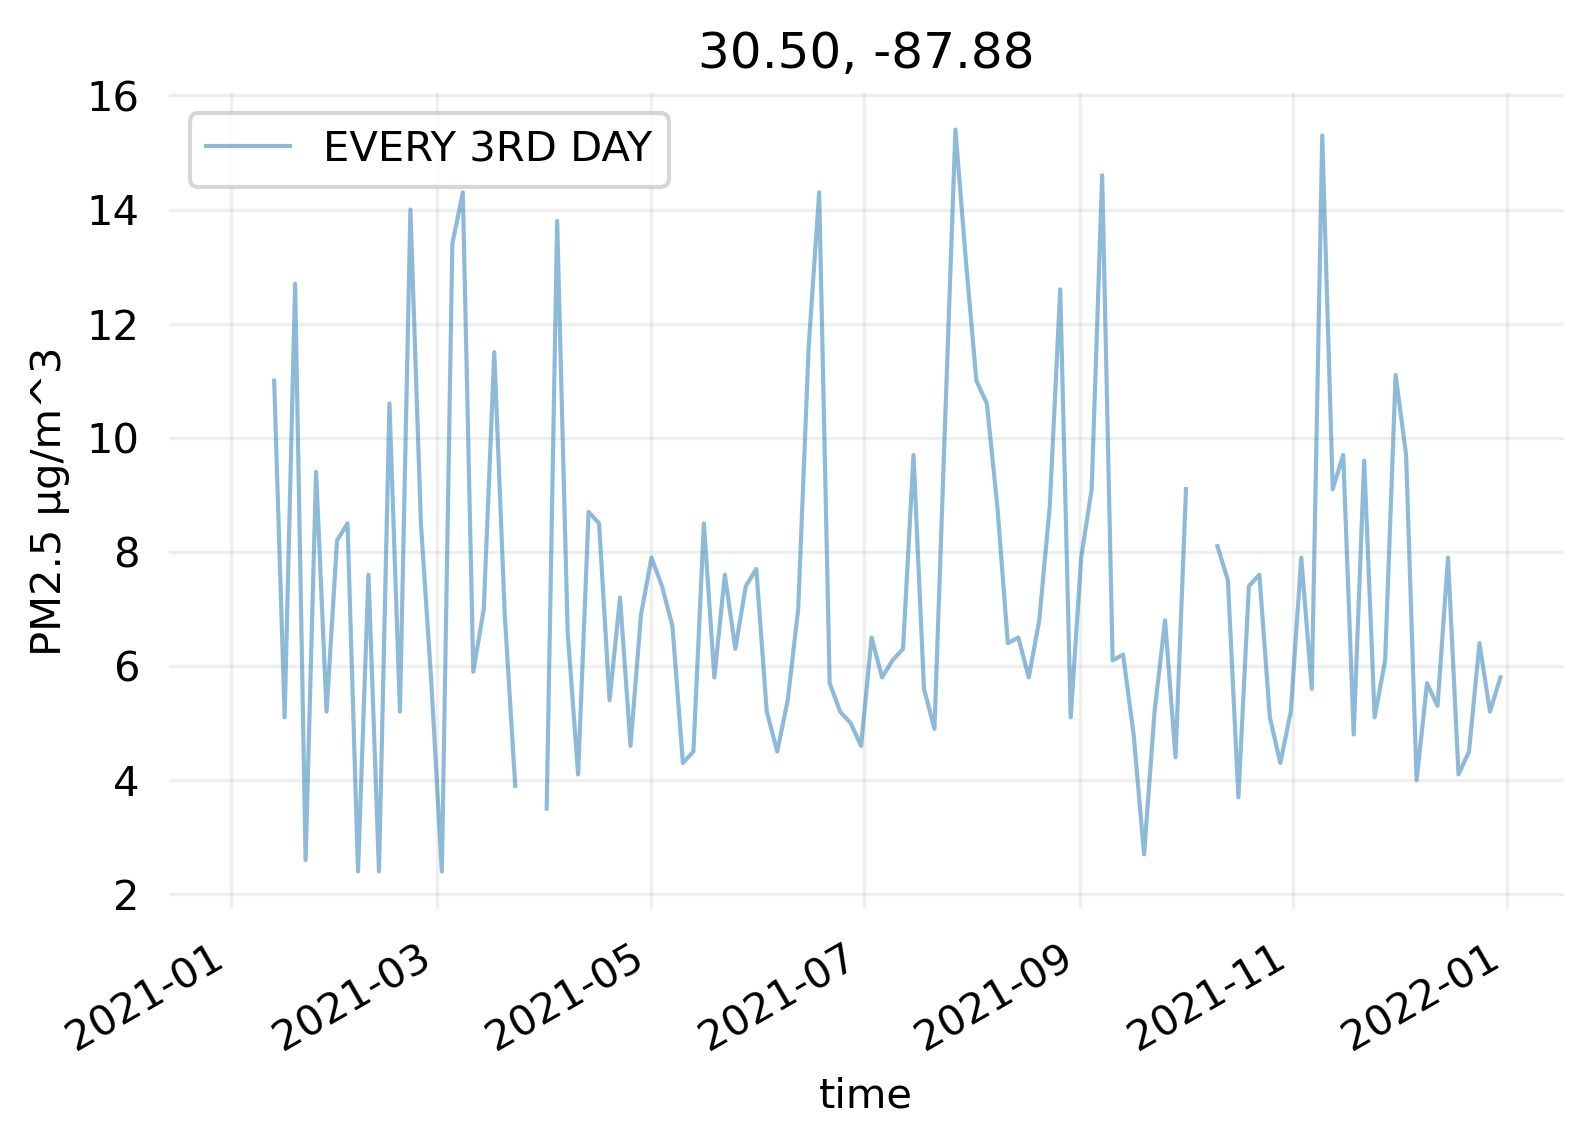

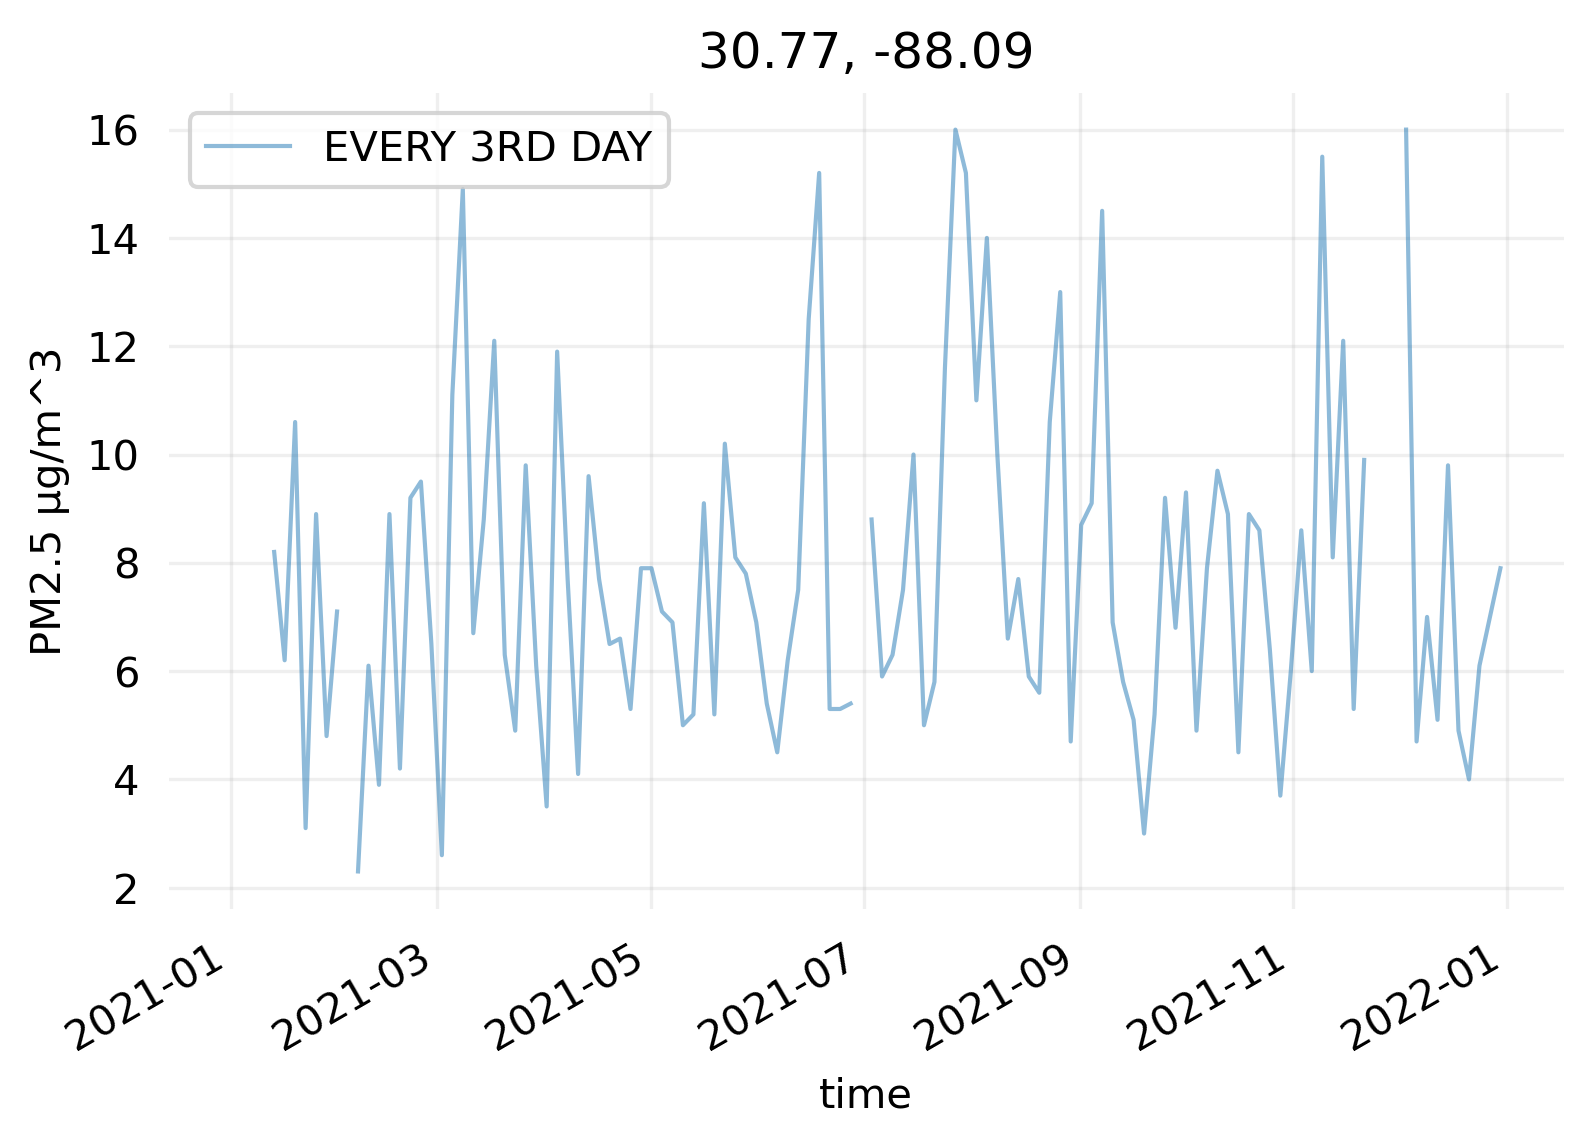

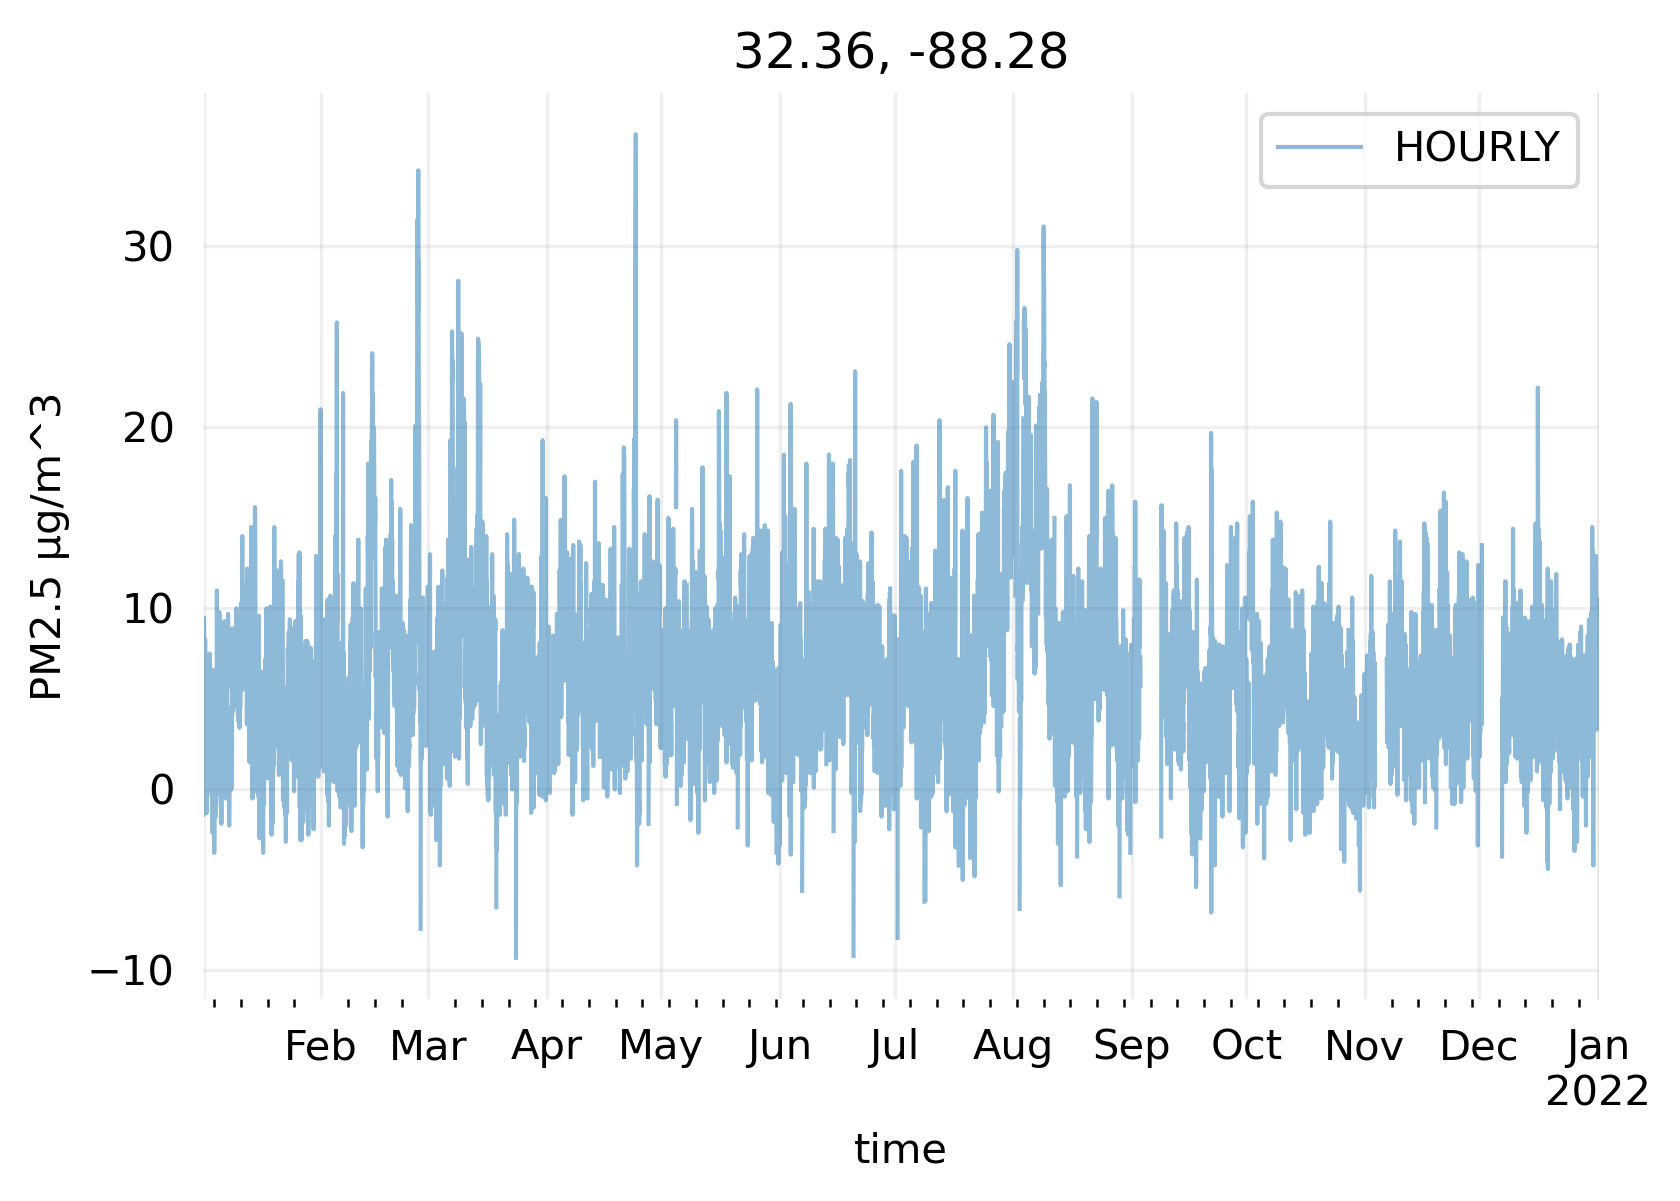

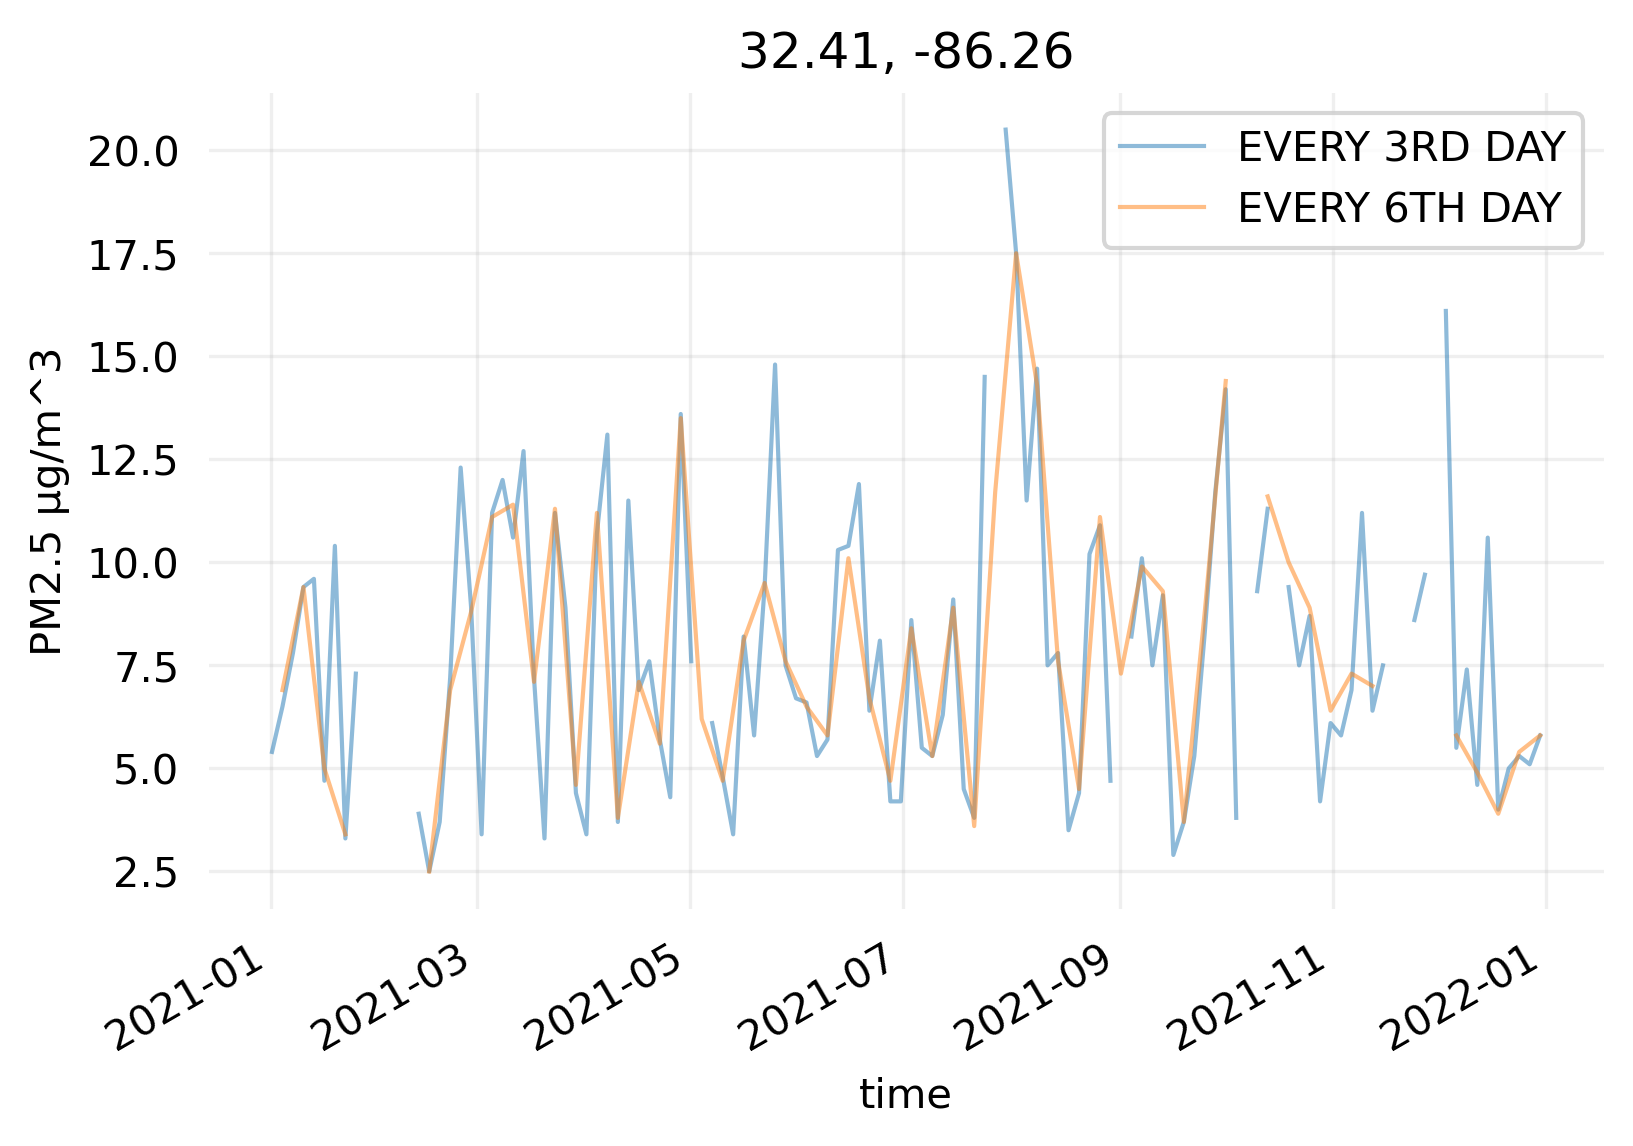

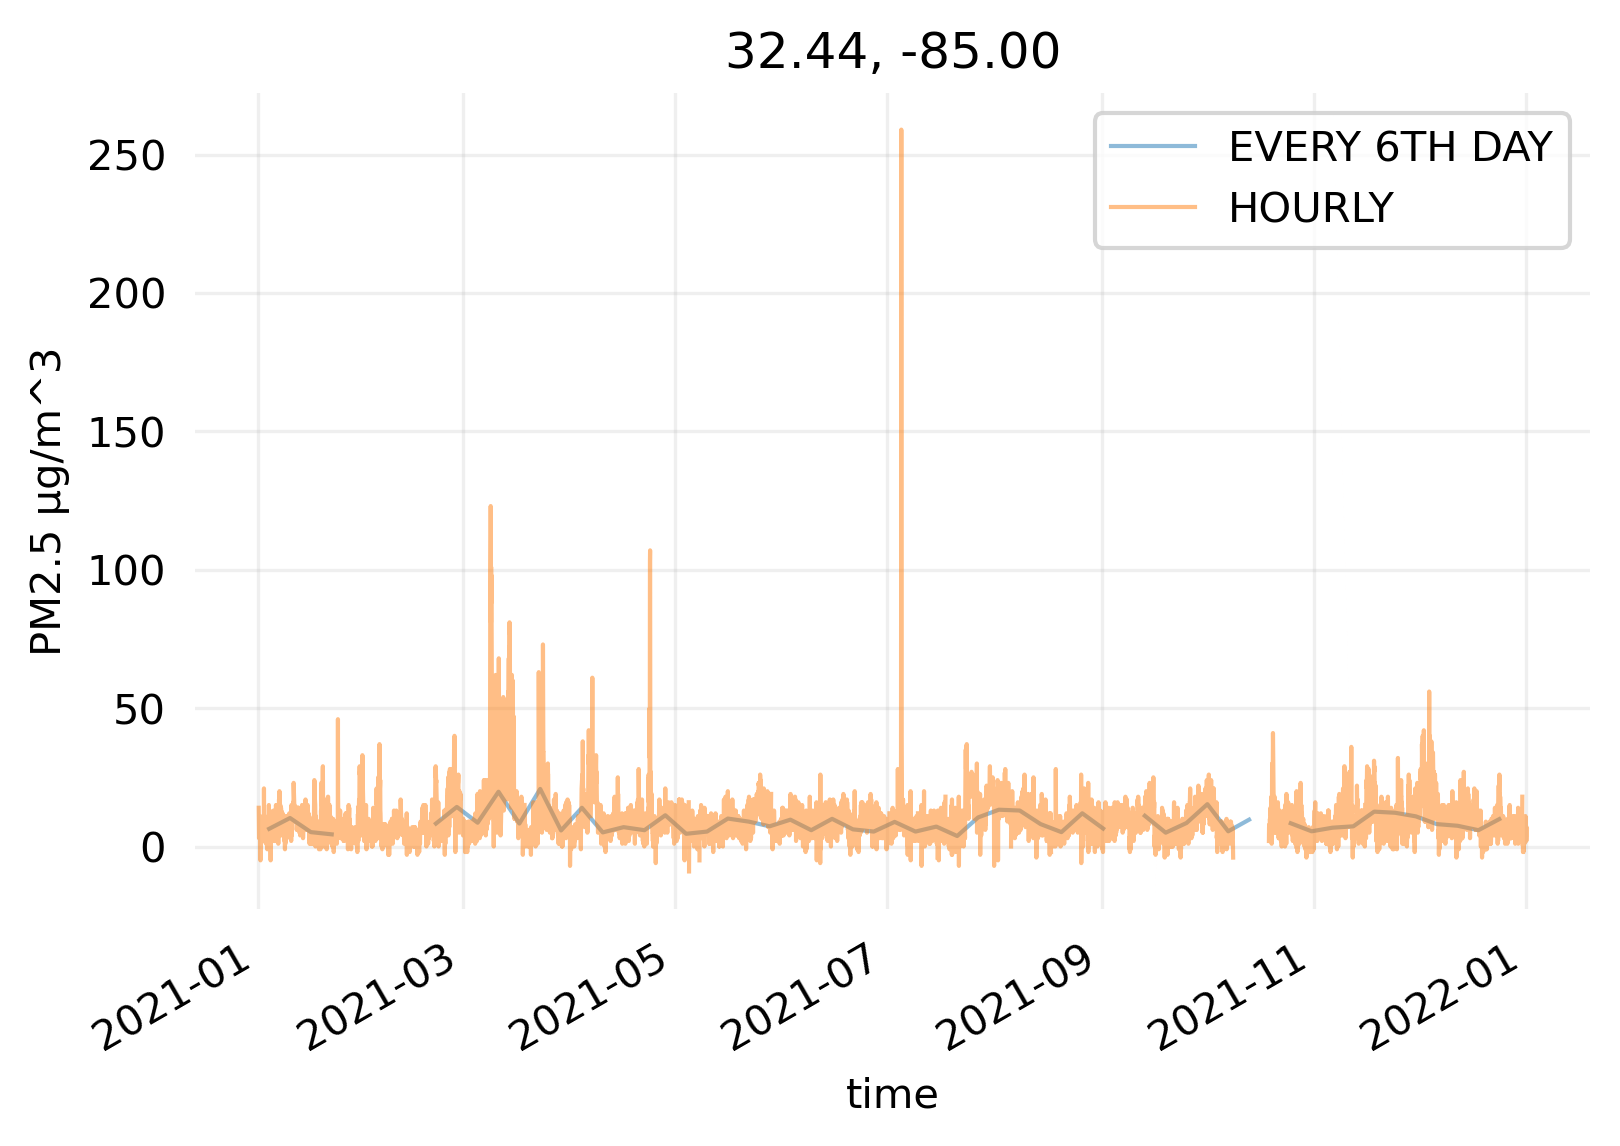

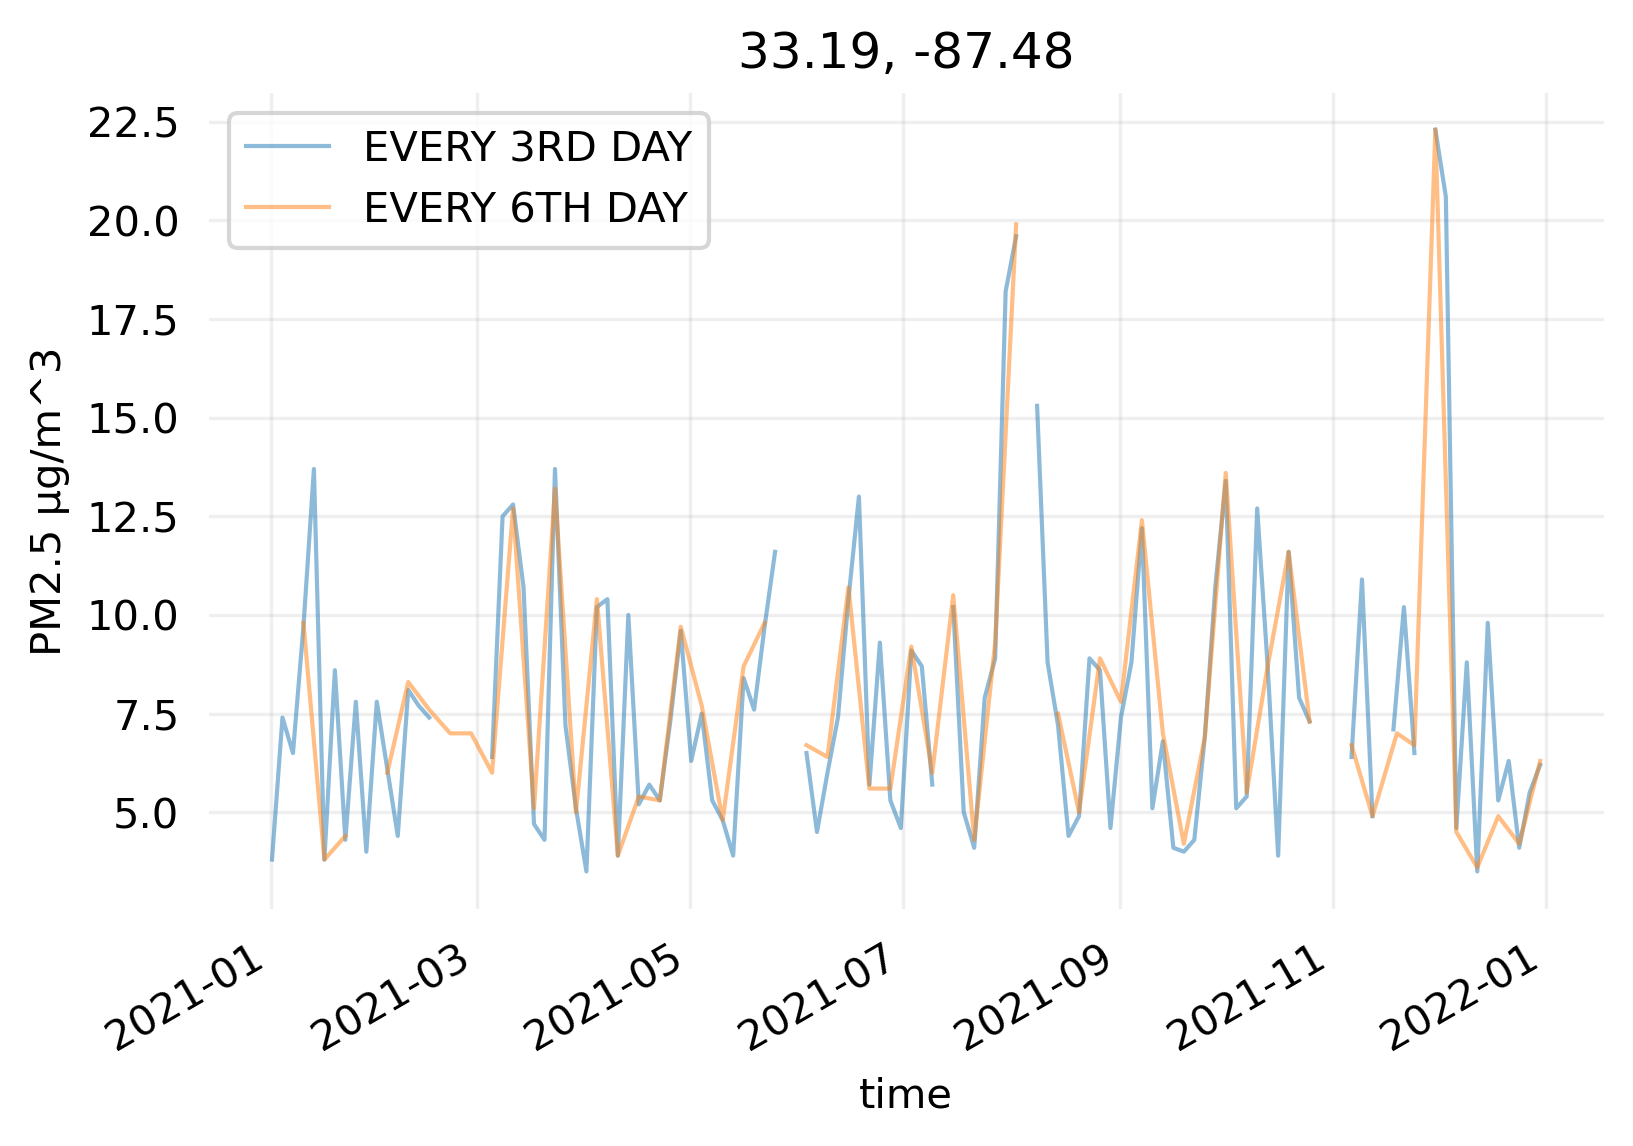

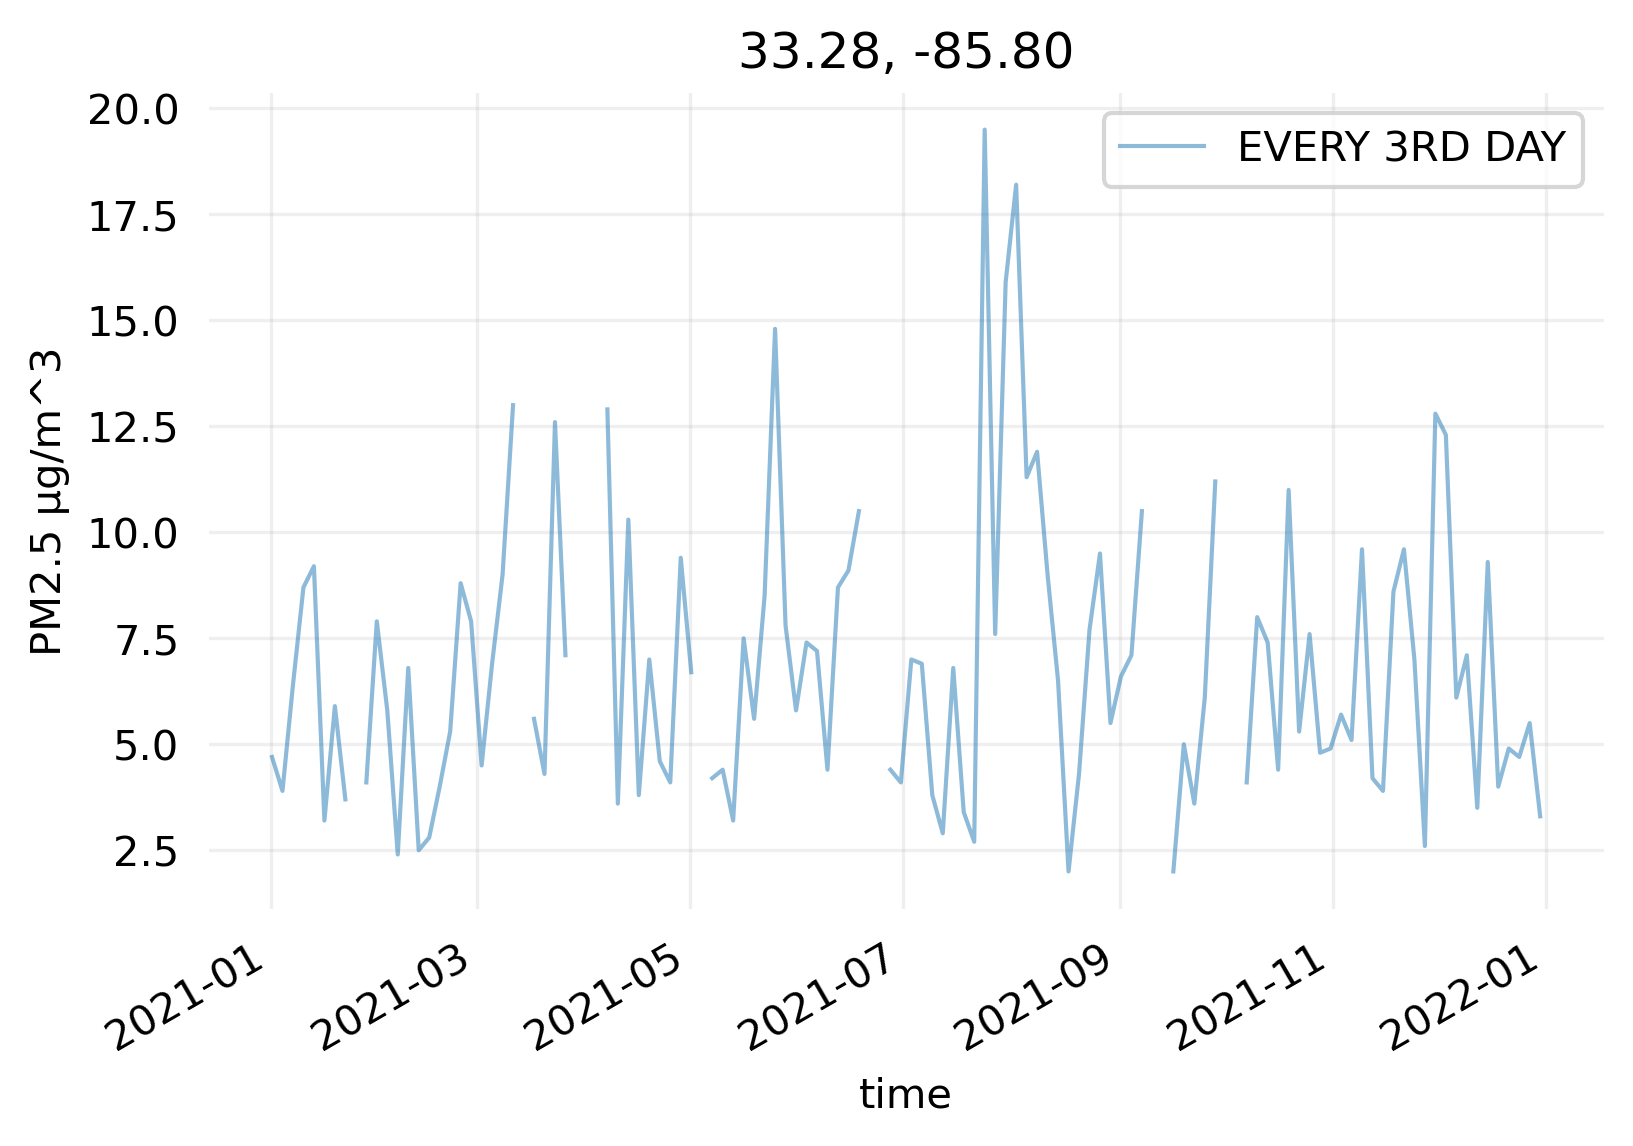

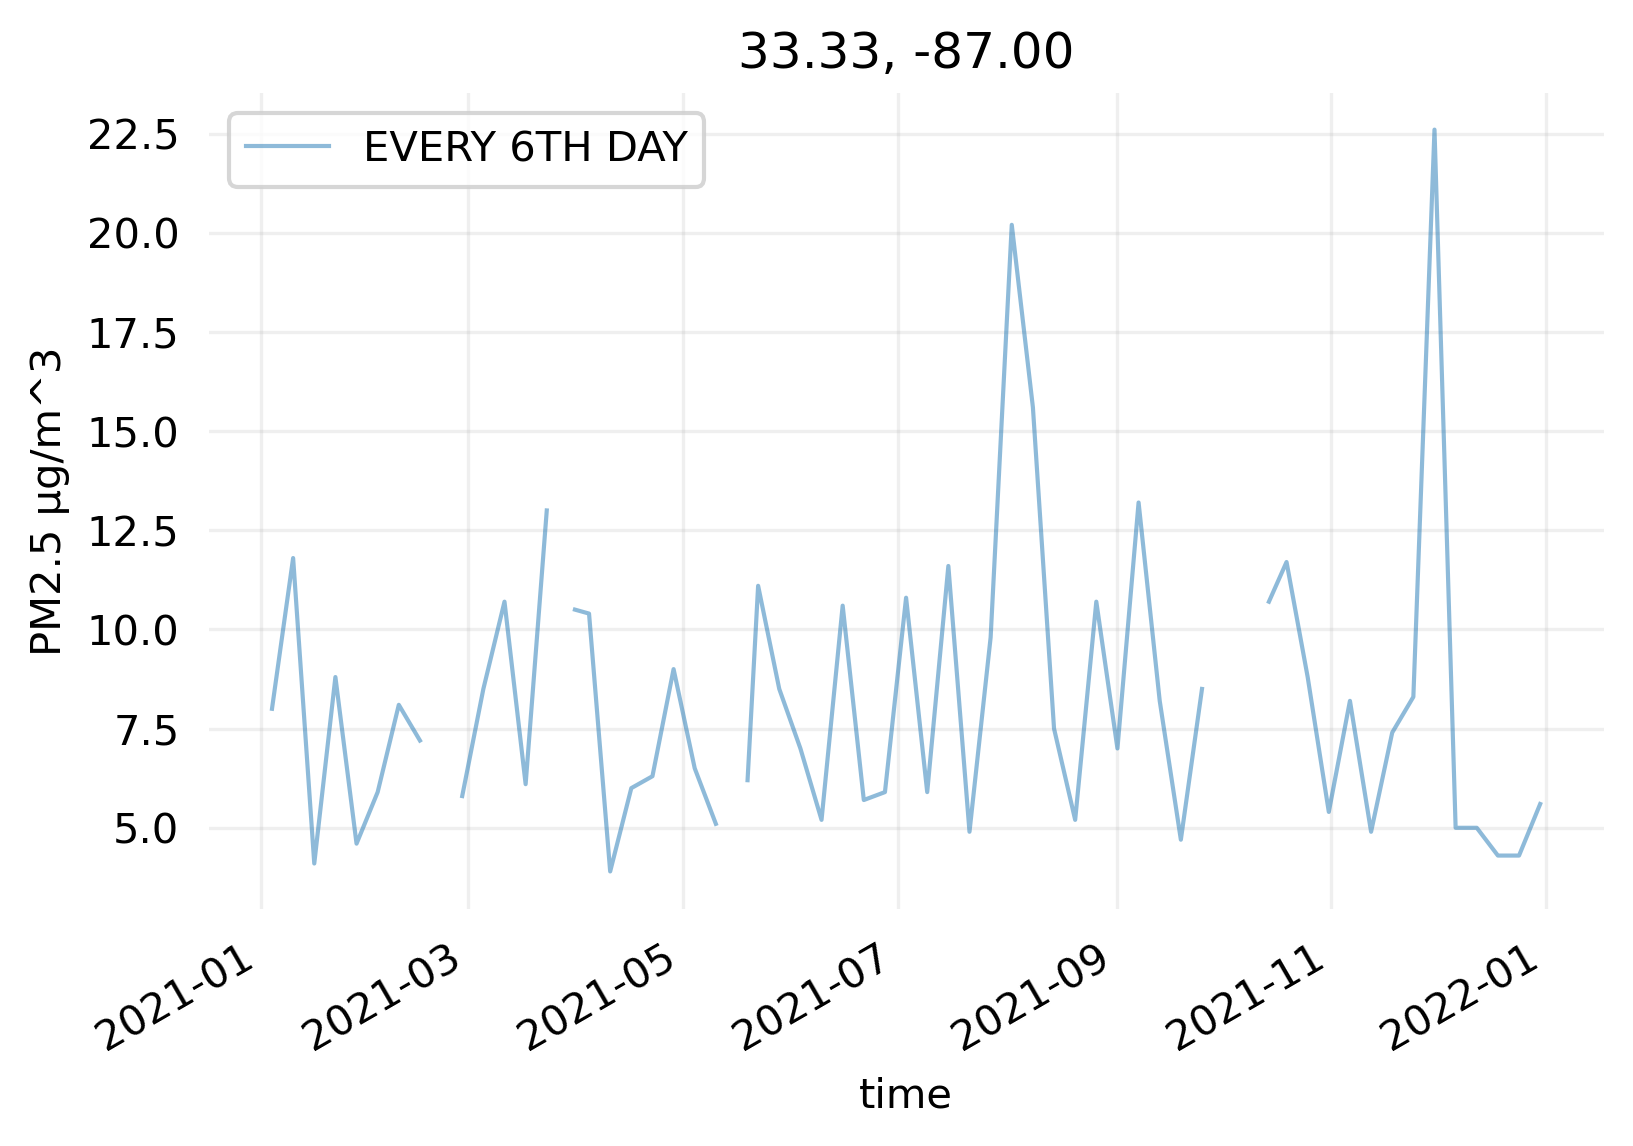

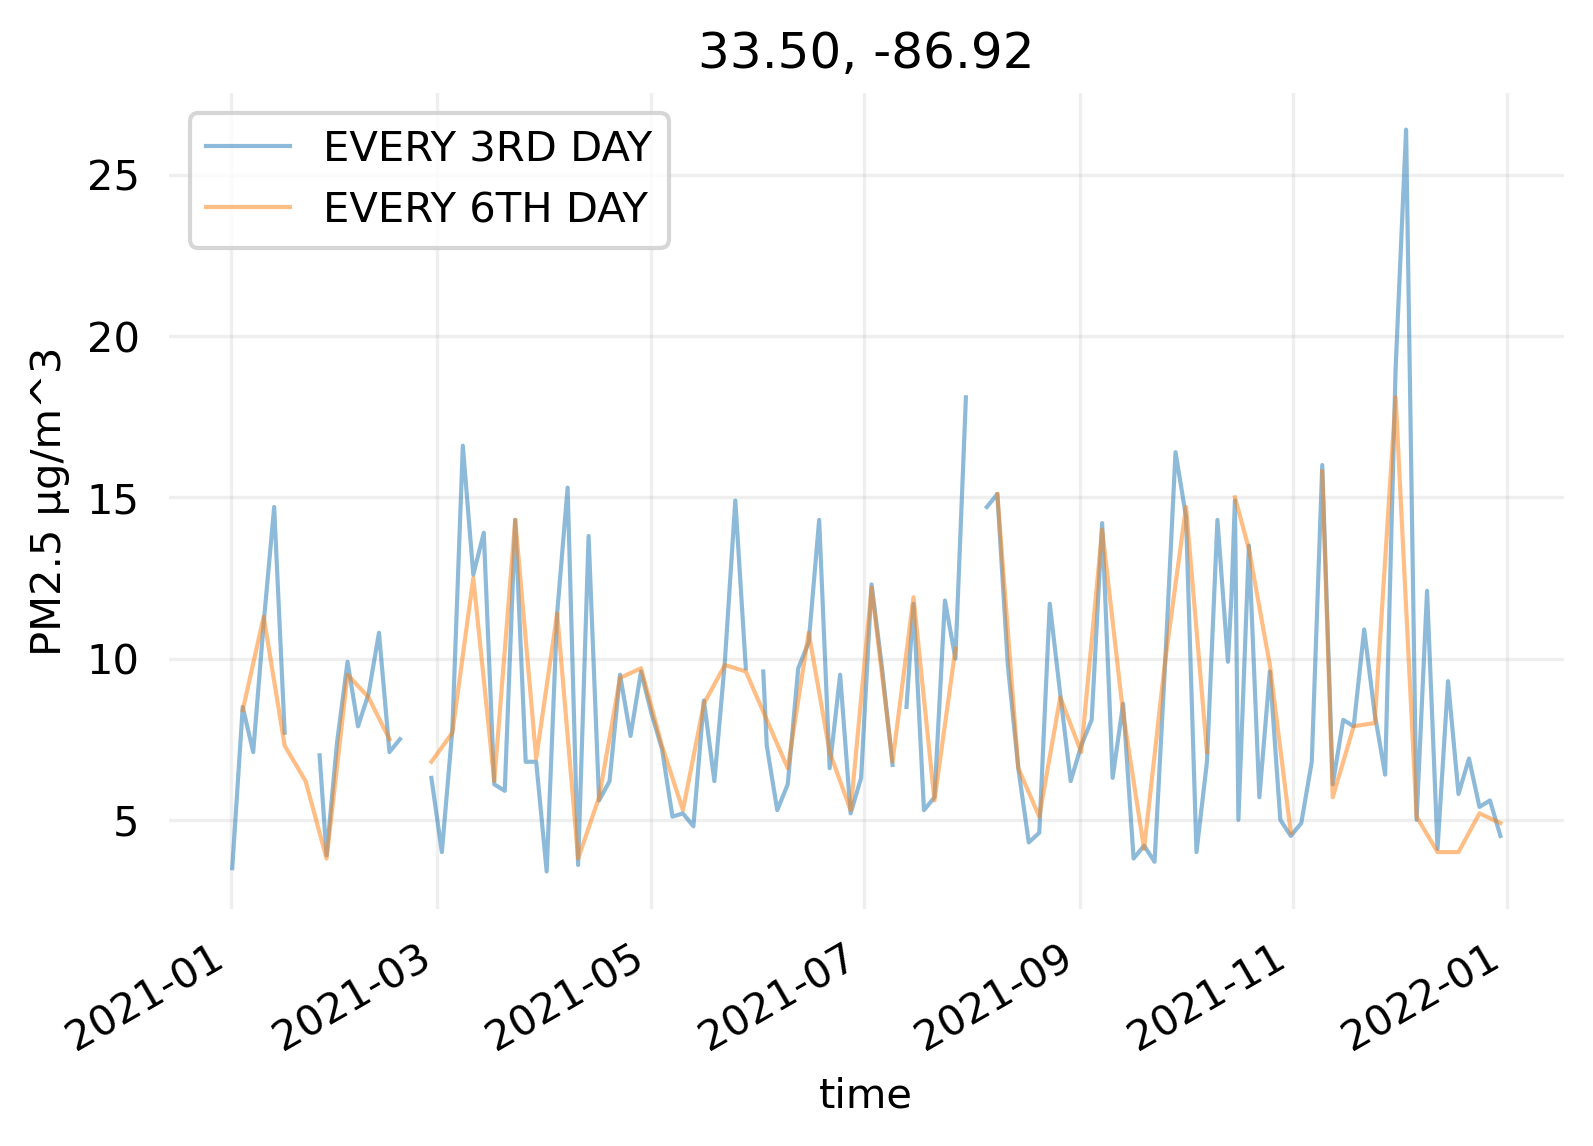

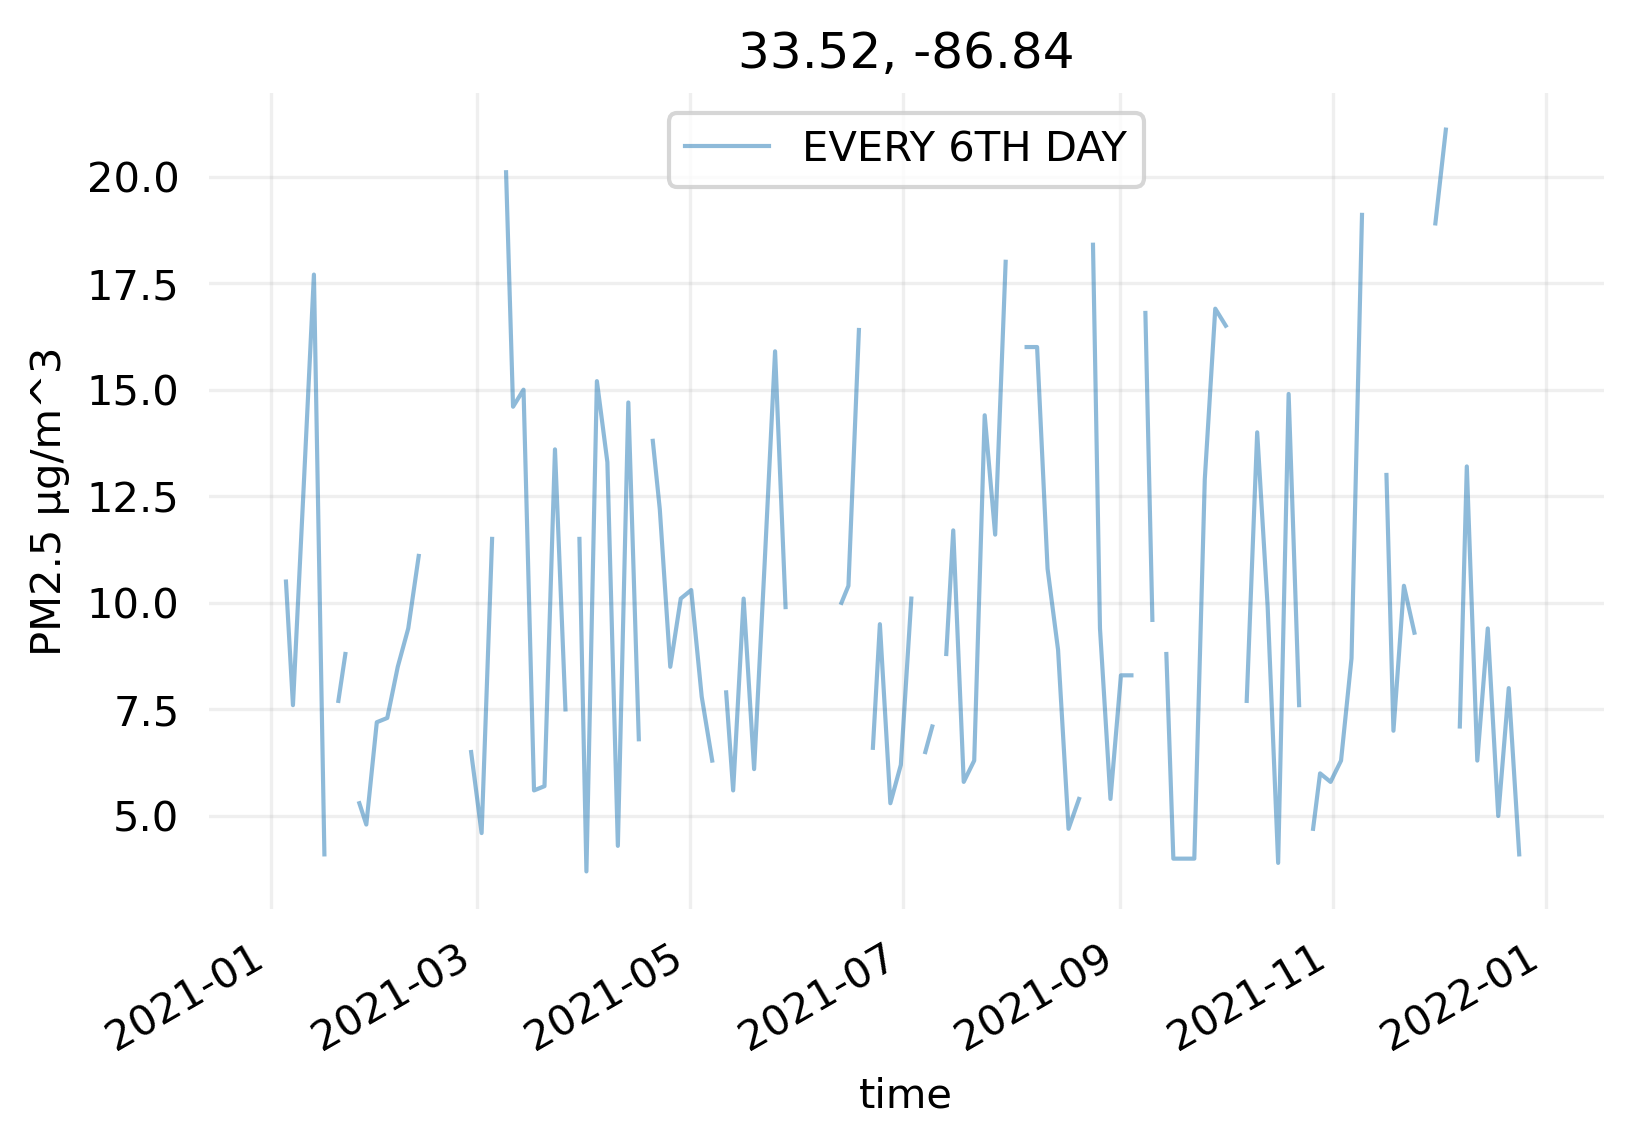

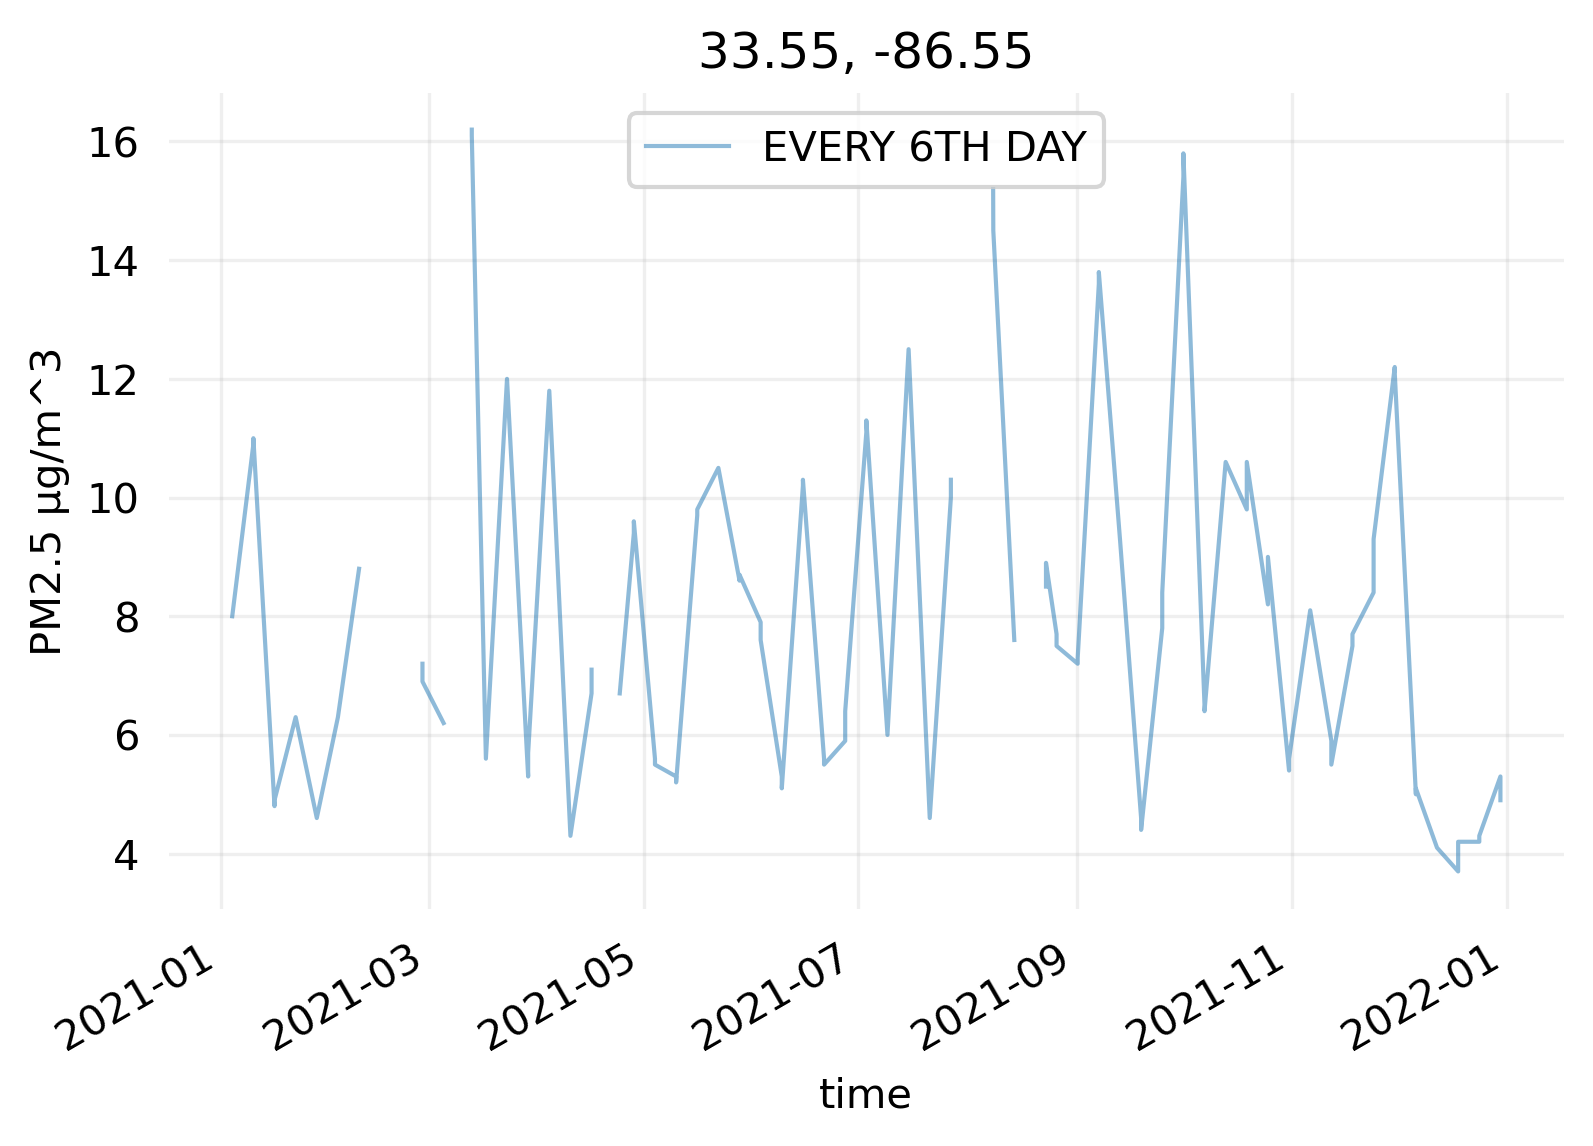

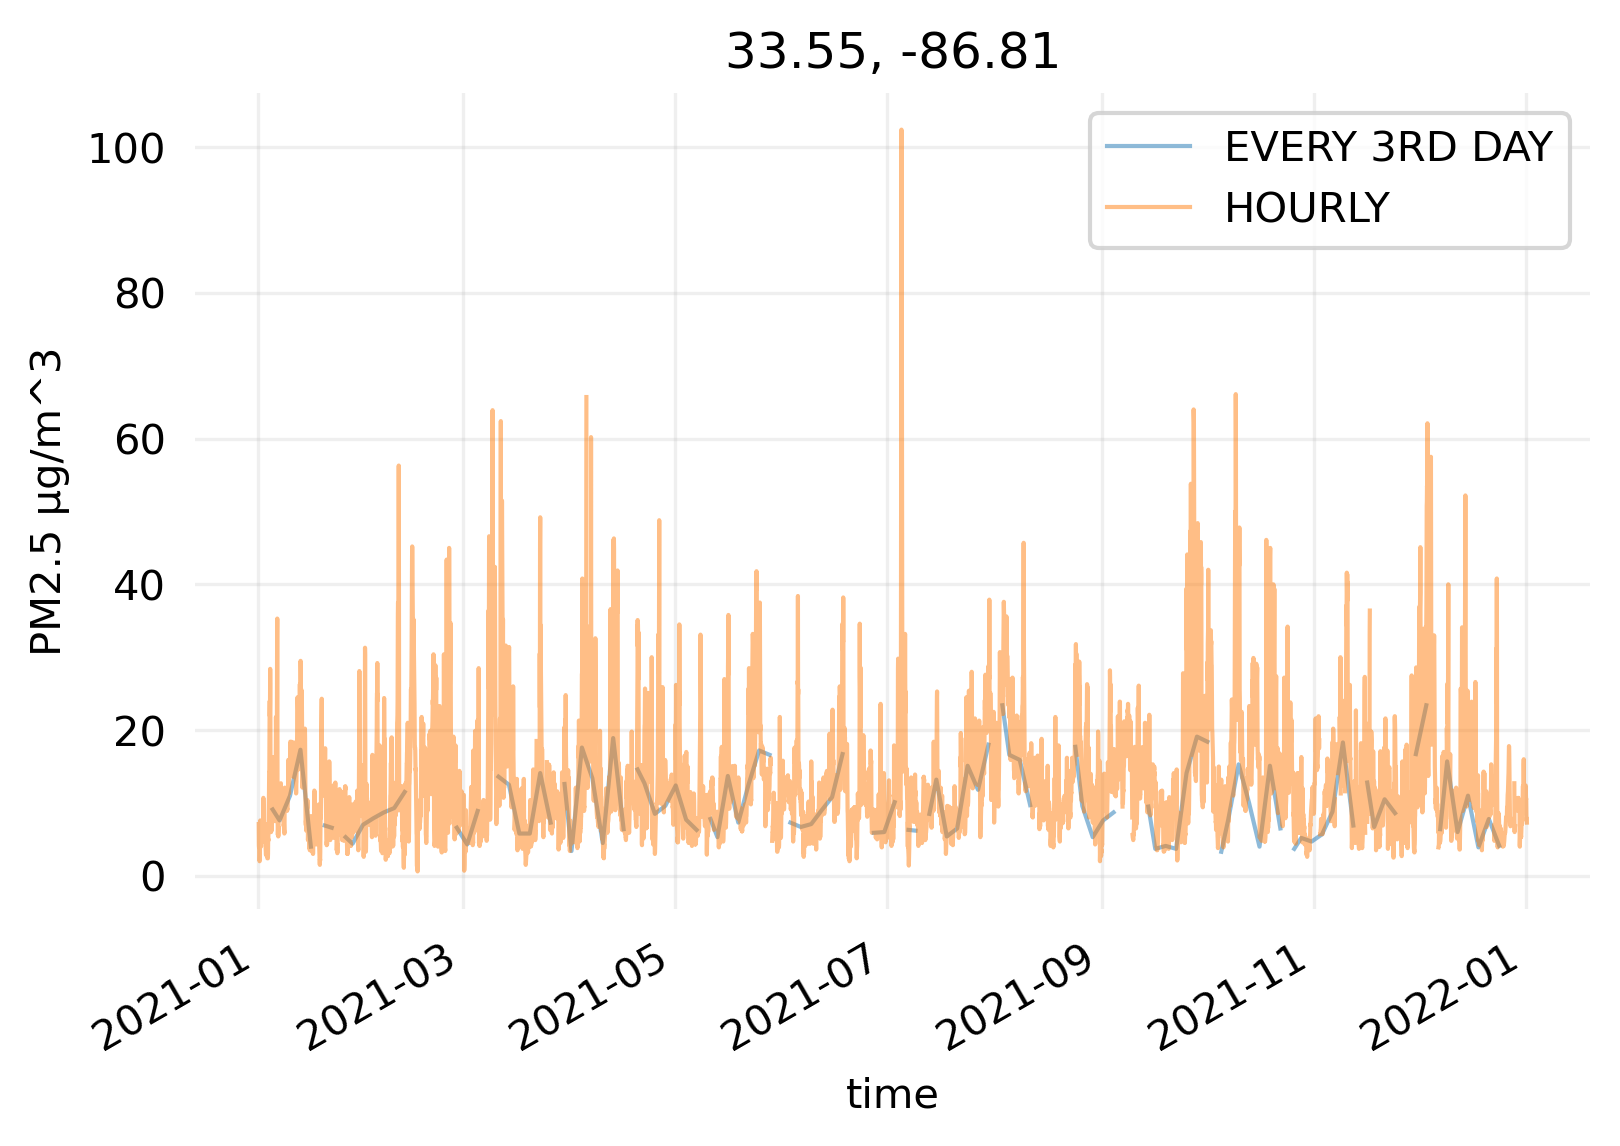

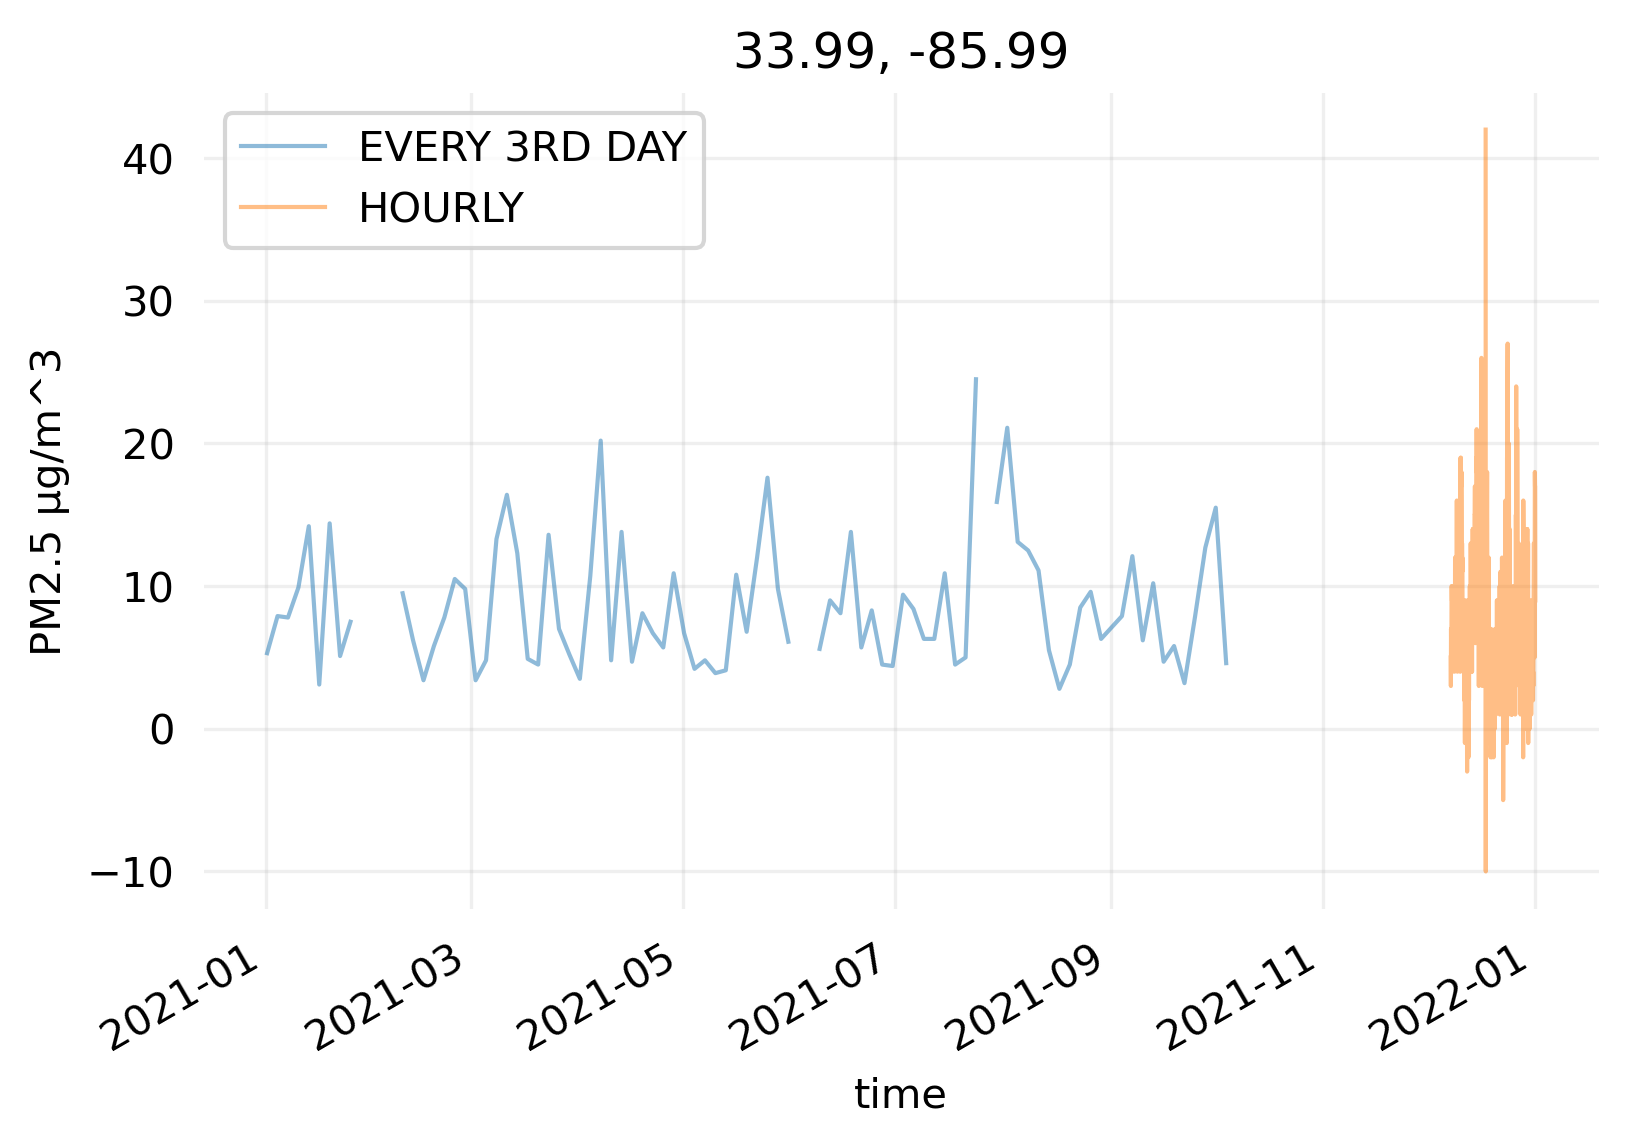

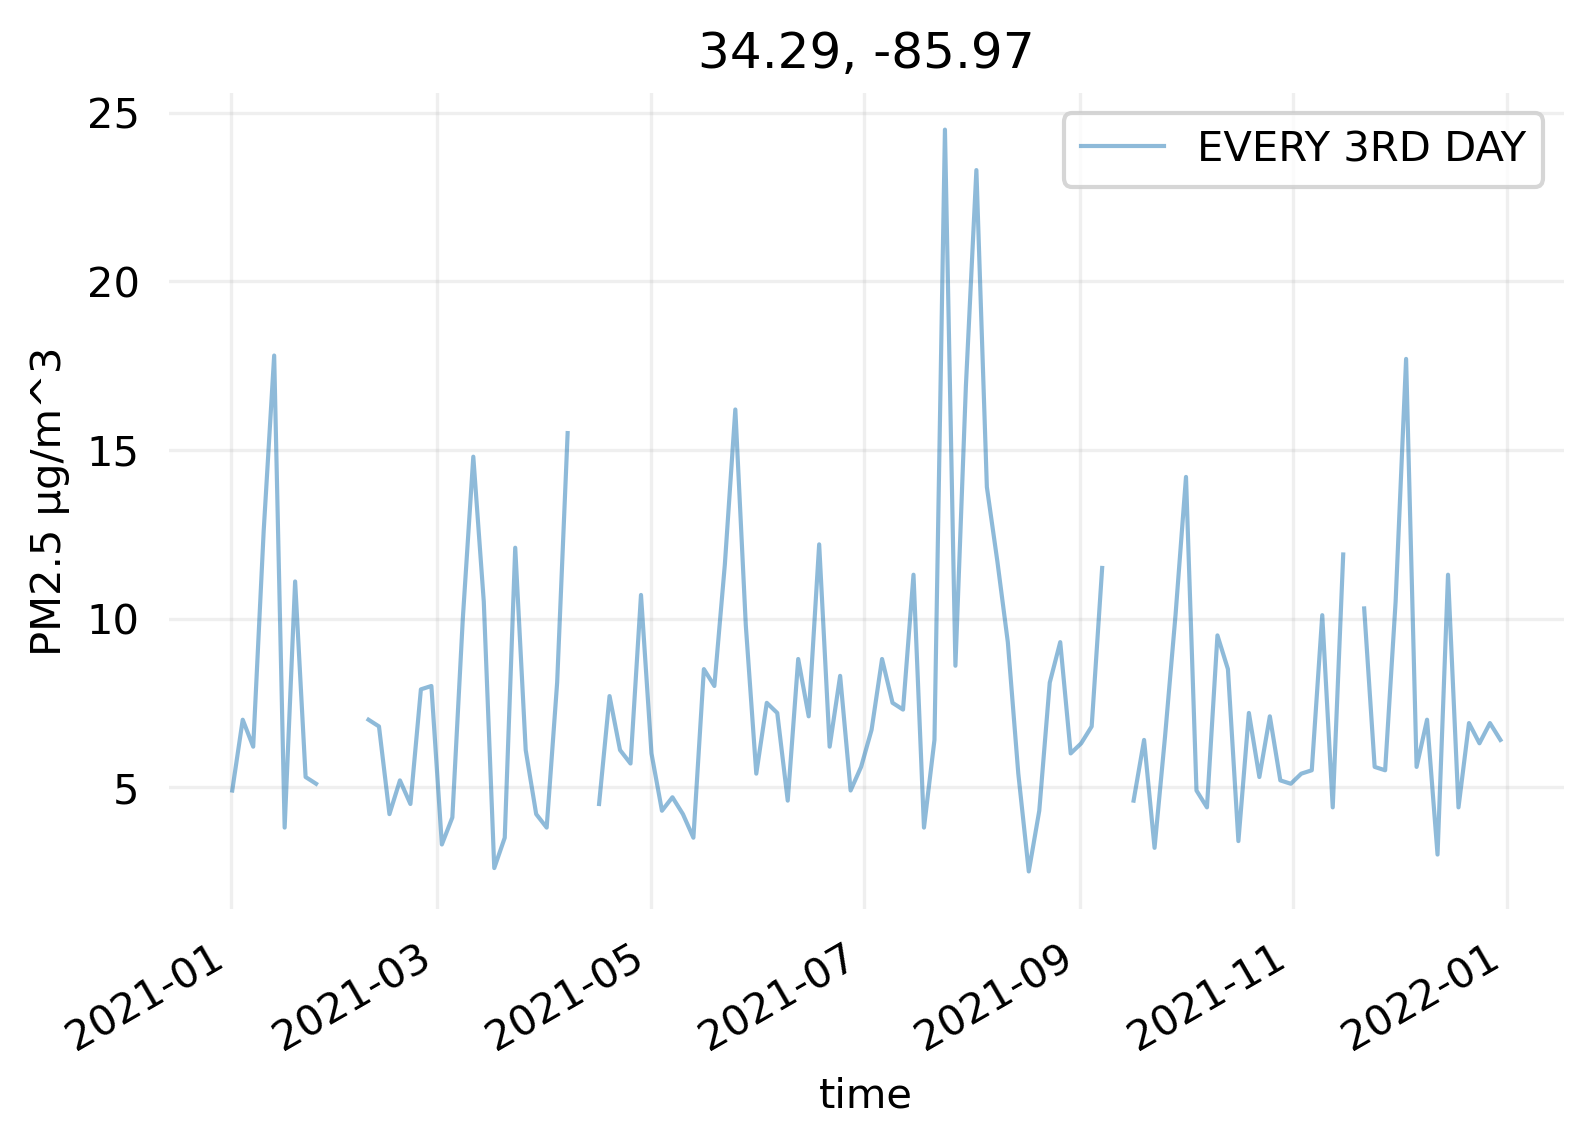

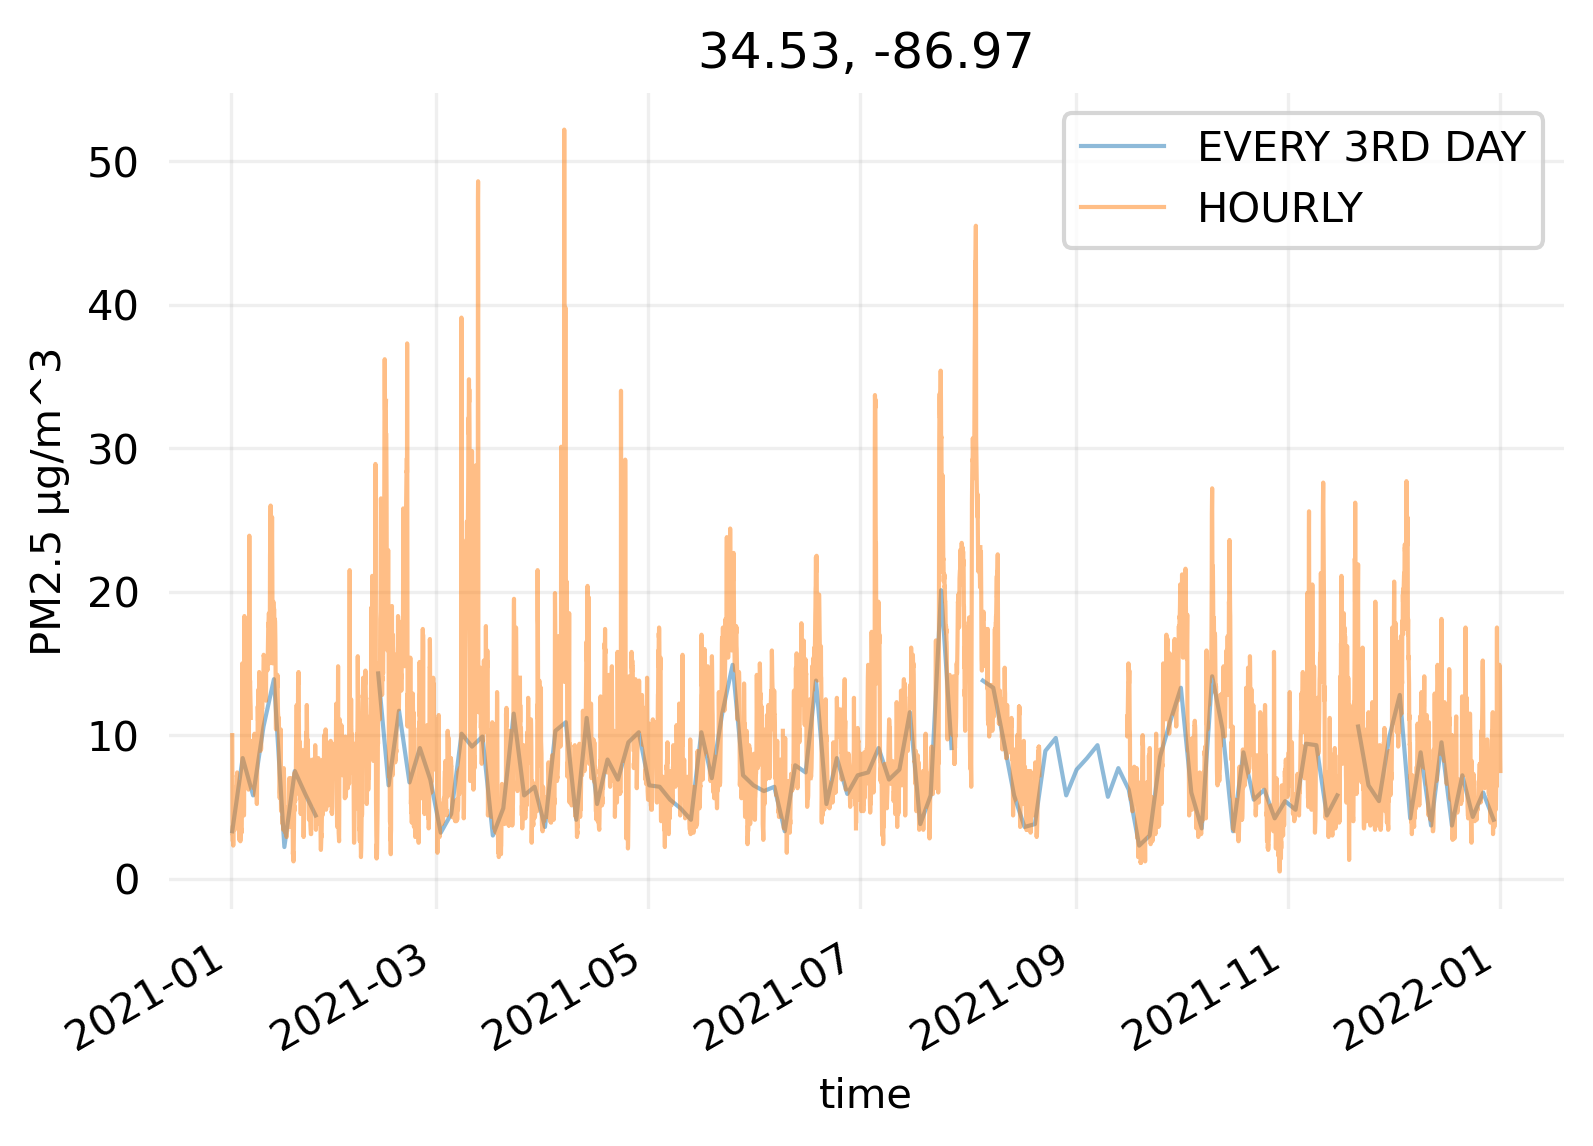

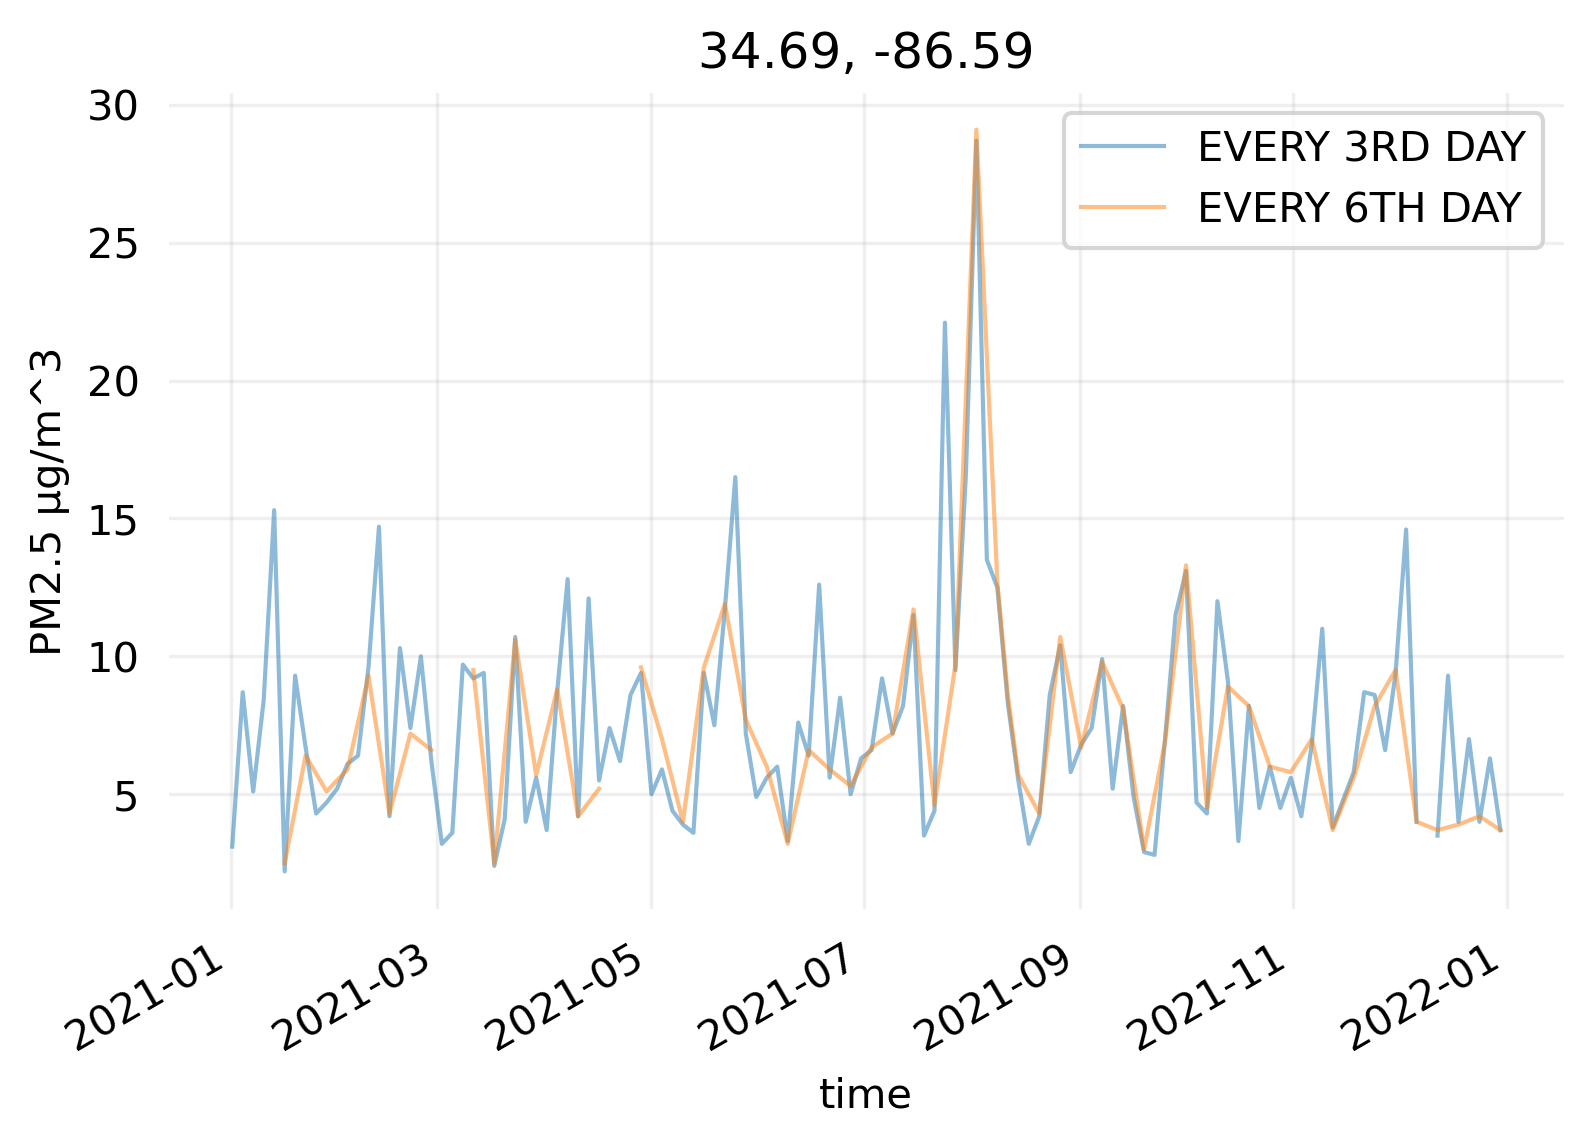

In [13]:
for (lat, lon), gdf in df.groupby(['latitude', 'longitude']):
    fig, ax = plt.subplots(dpi=300)
    
    gdf.set_index('time').groupby('sample_frequency')['sample_measurement'].plot(
        x='time', y='sample_measurement', title=f'{lat:.2f}, {lon:.2f}', ax=ax,
        lw=1, alpha=0.5, legend=True
    )
    
    ax.grid(alpha=0.2)
    ax.tick_params(width=0)
    ax.set_ylabel('PM2.5 µg/m^3')
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

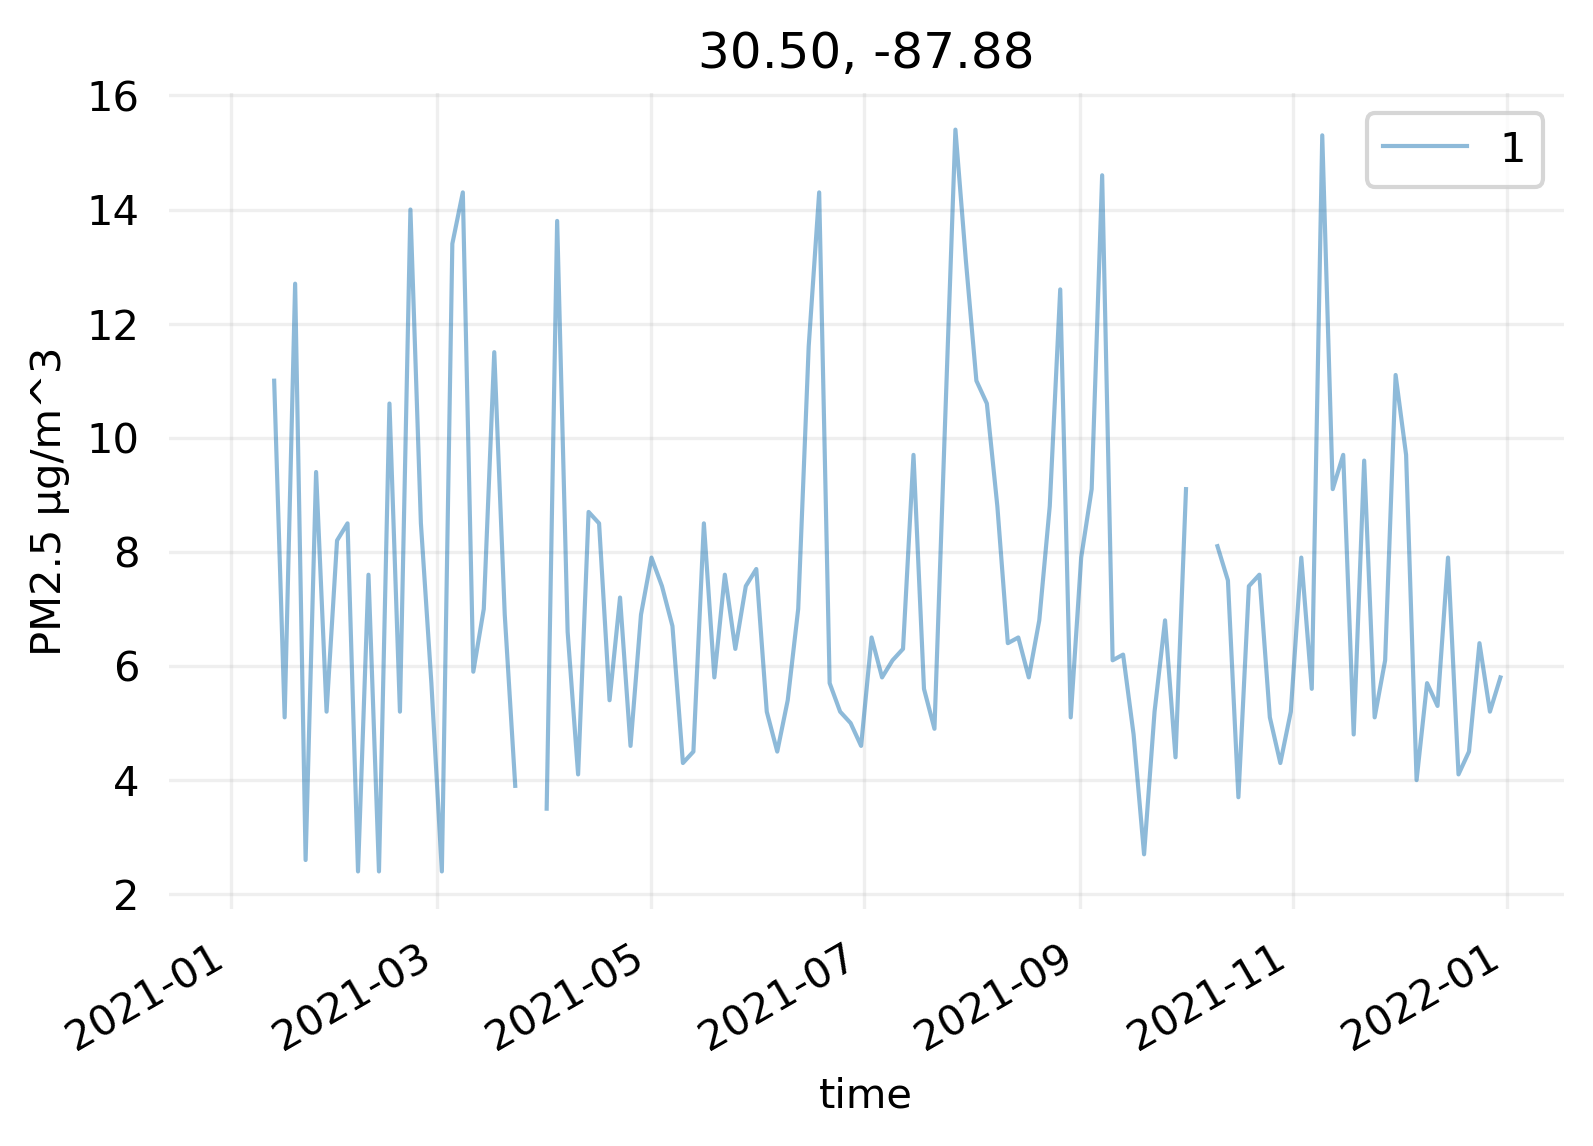

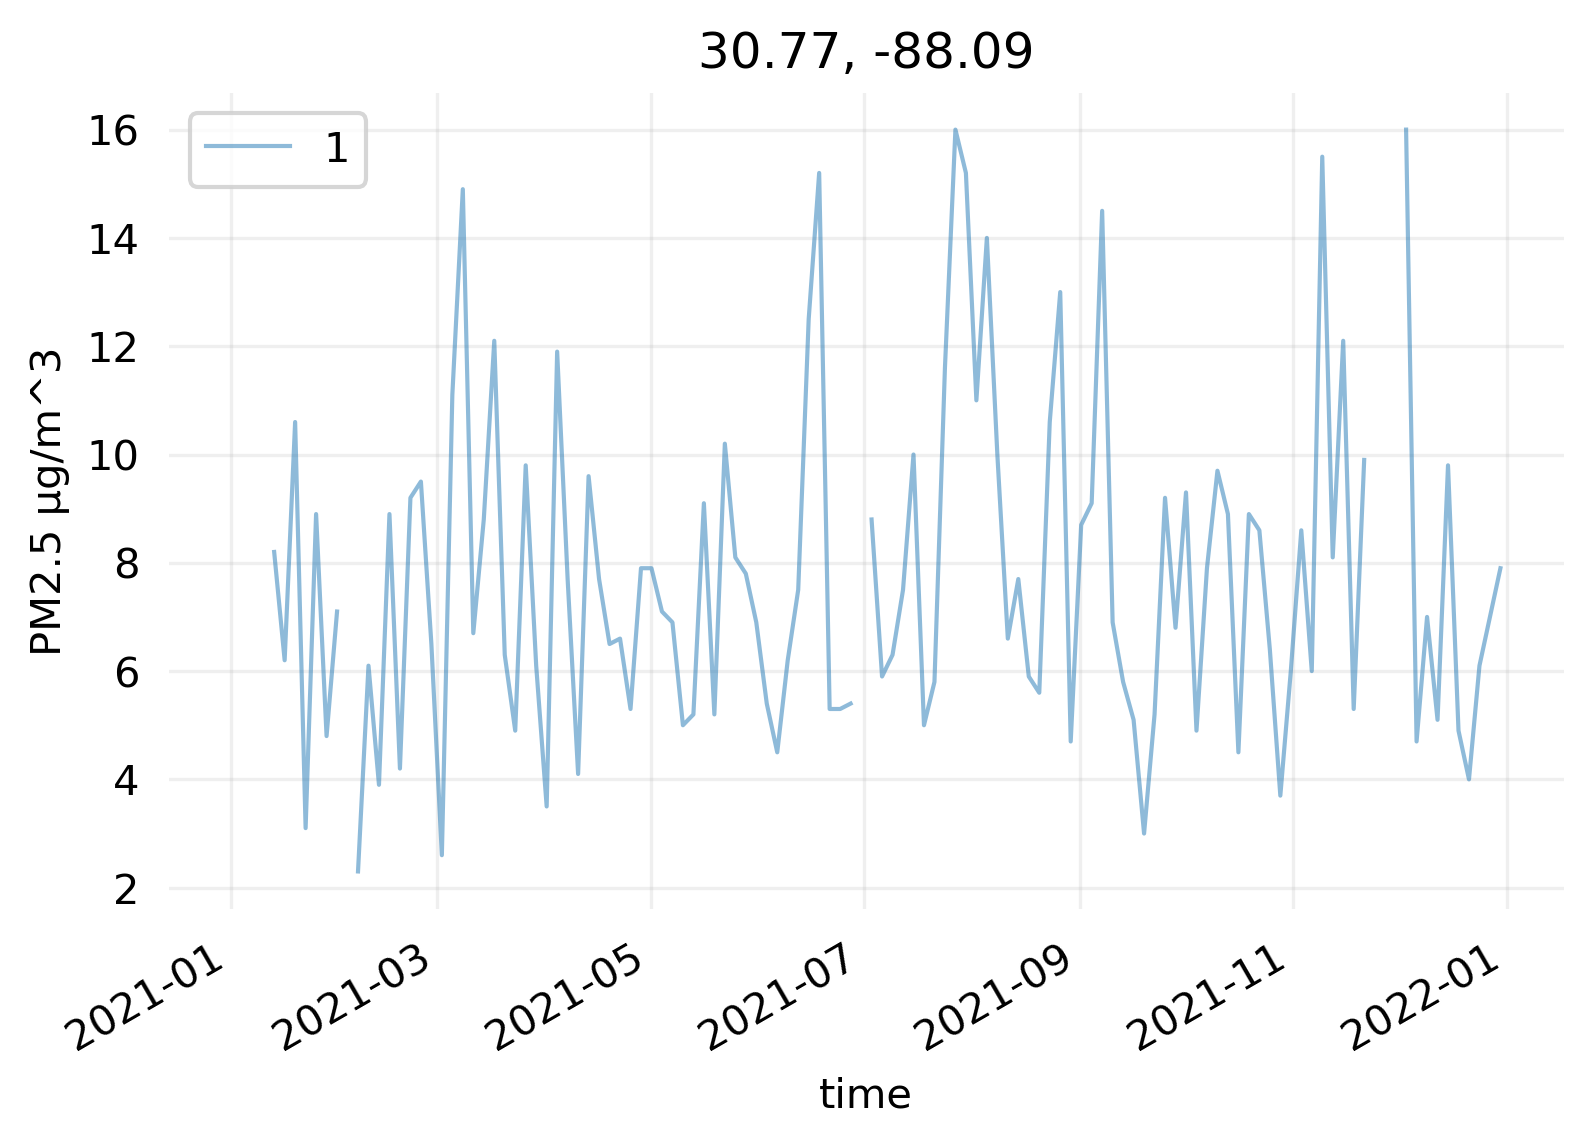

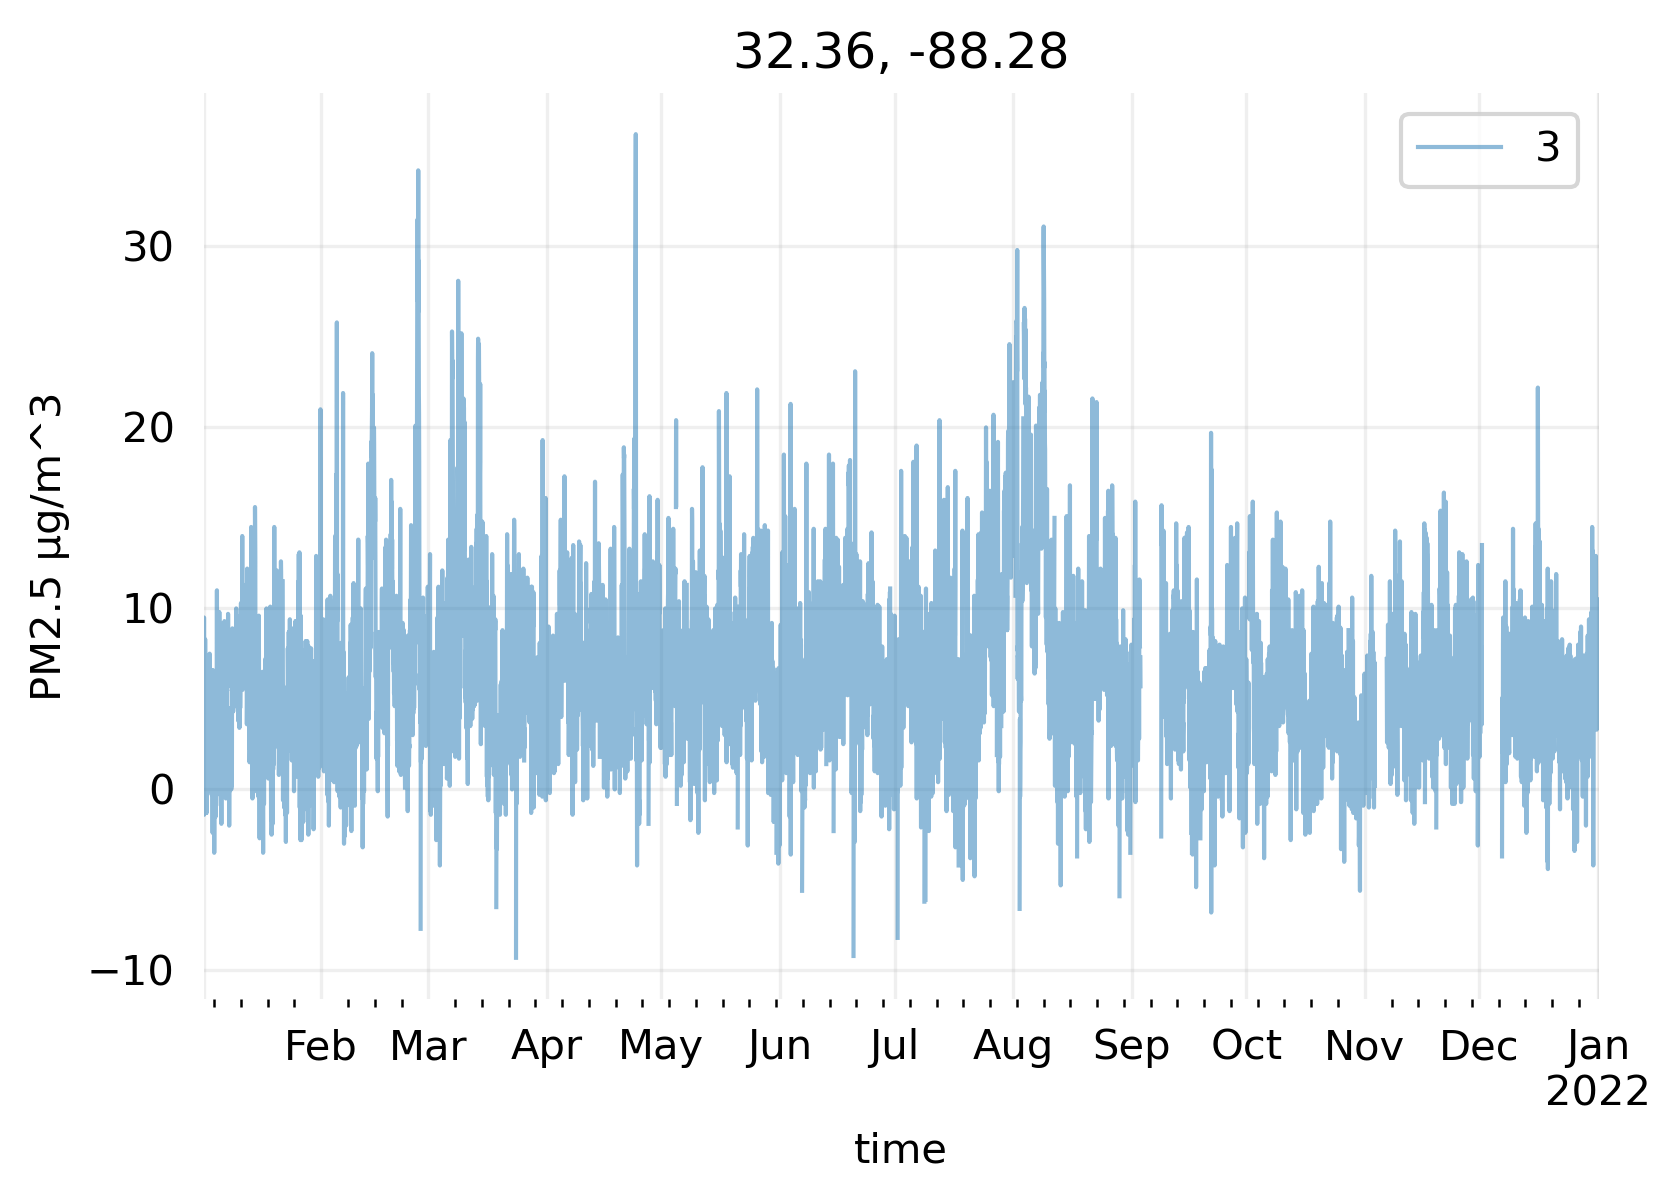

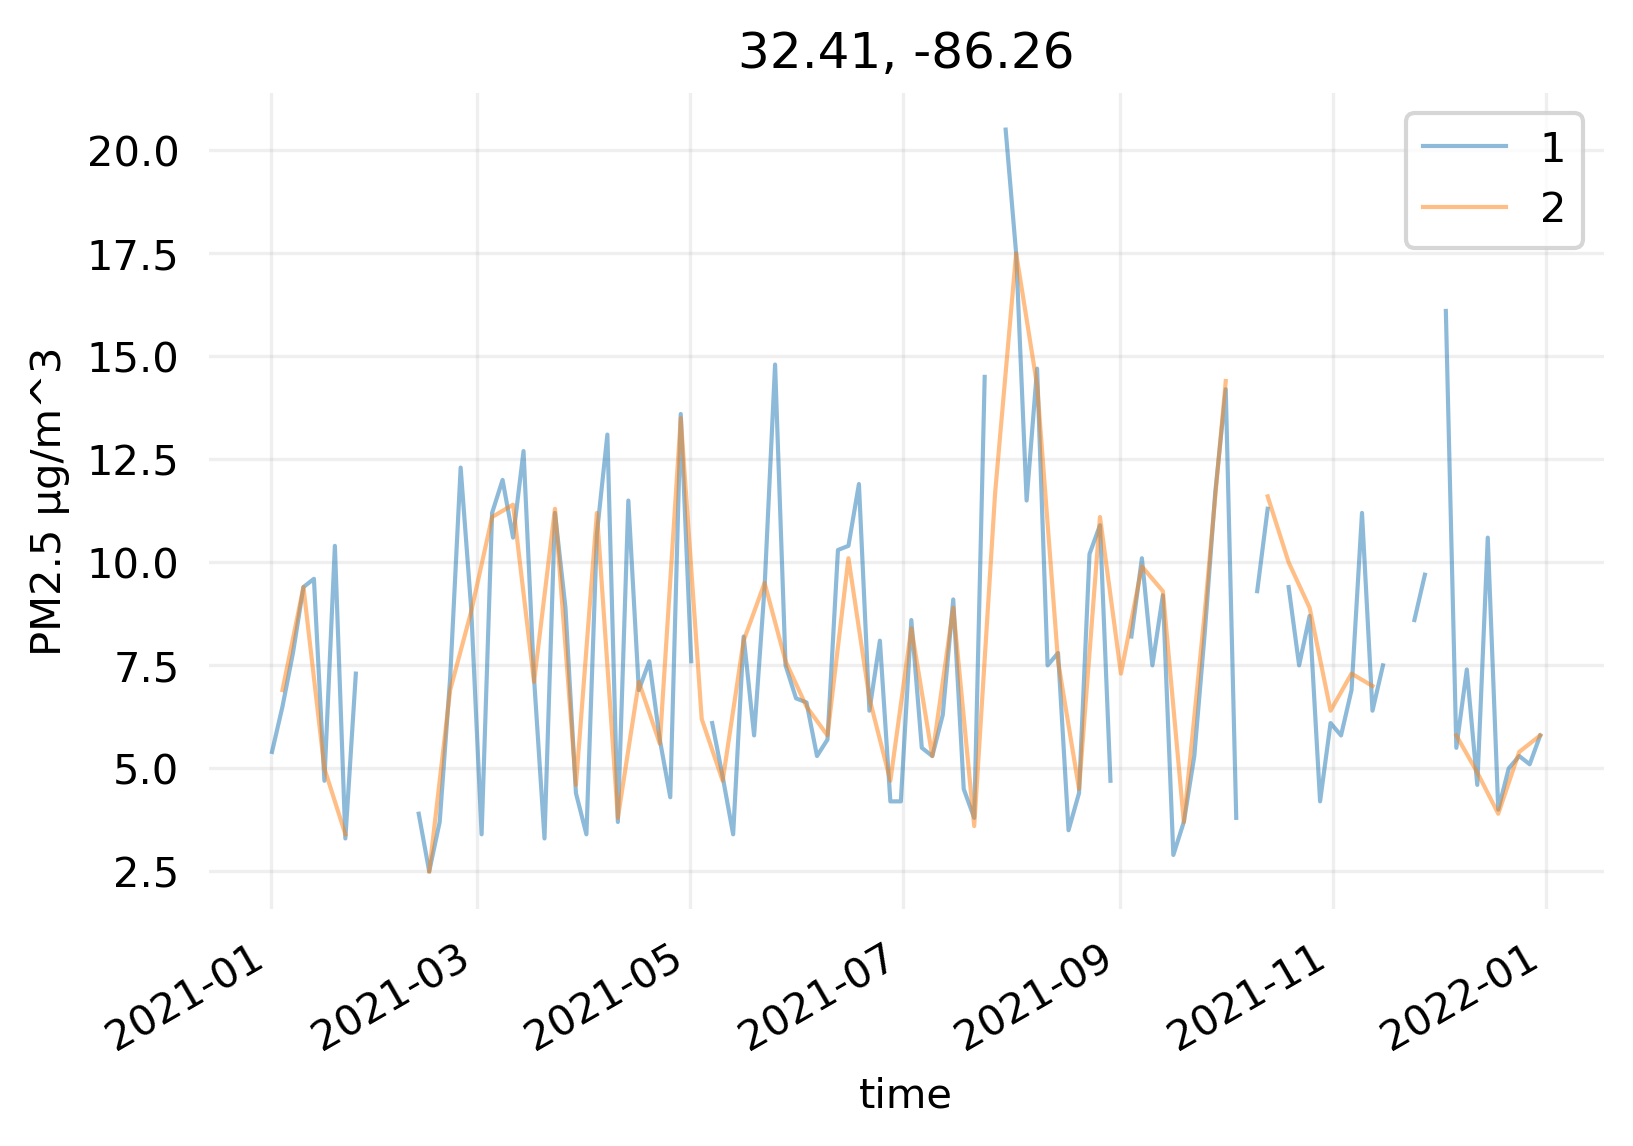

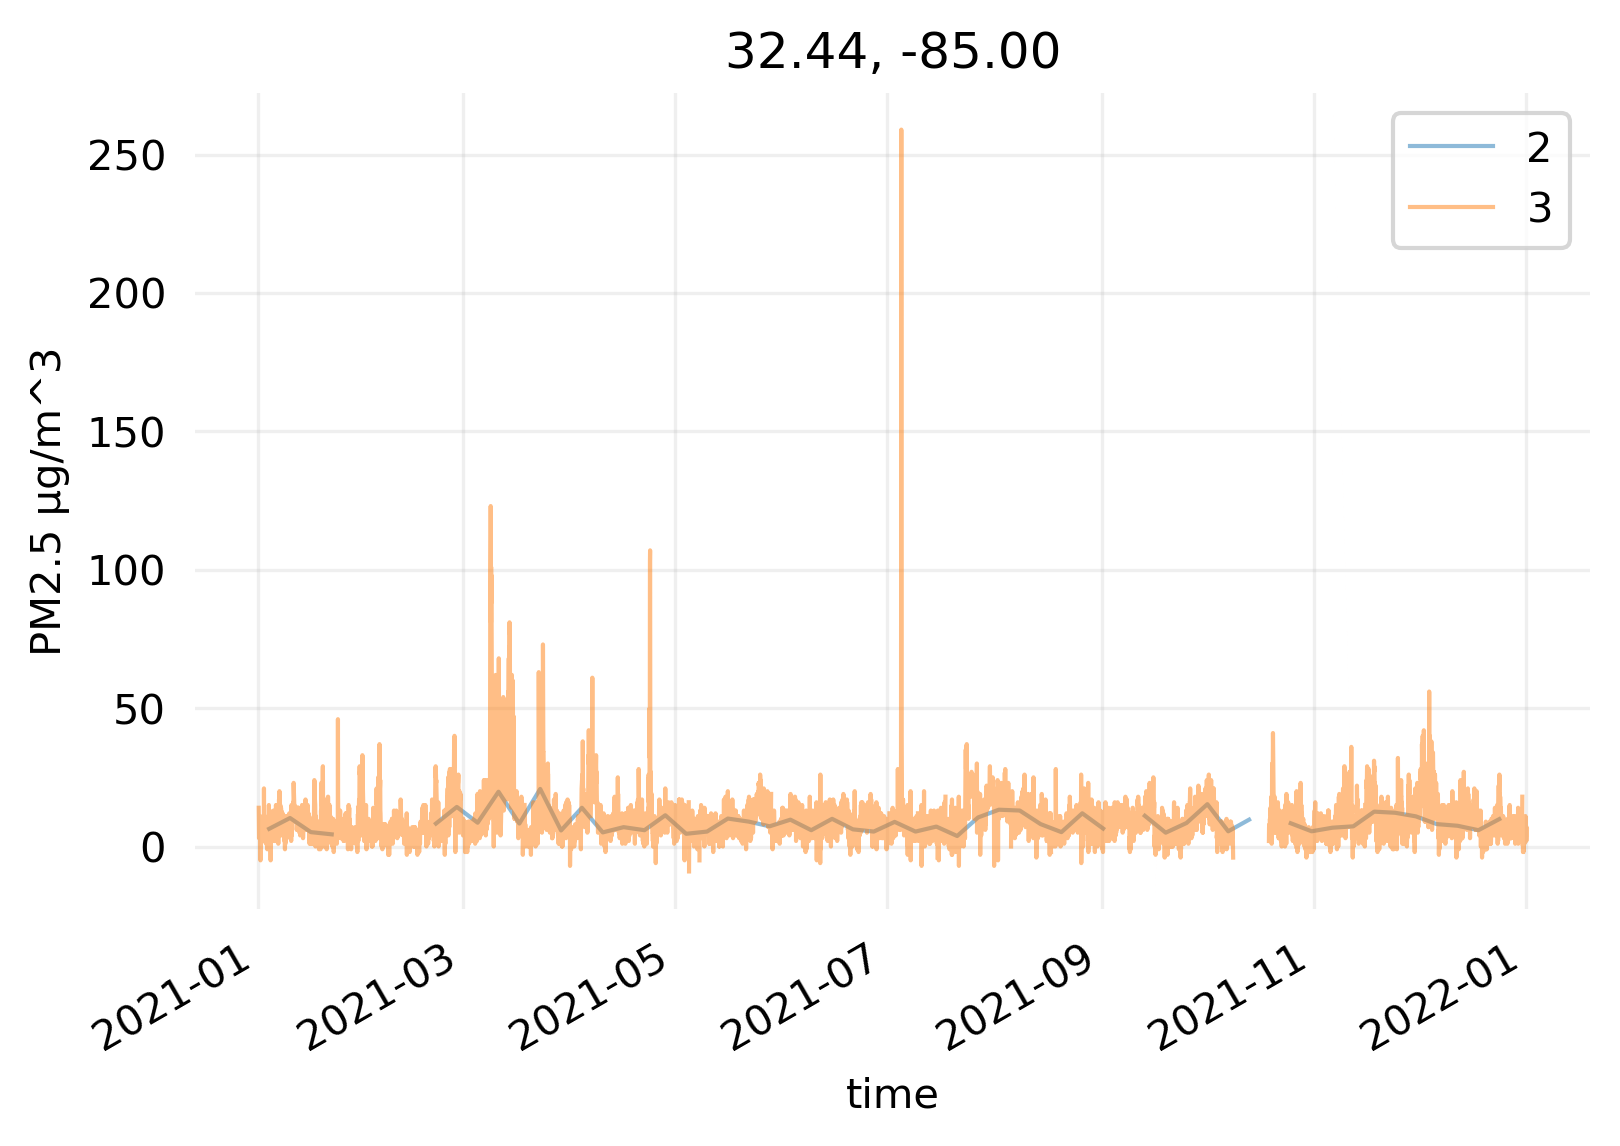

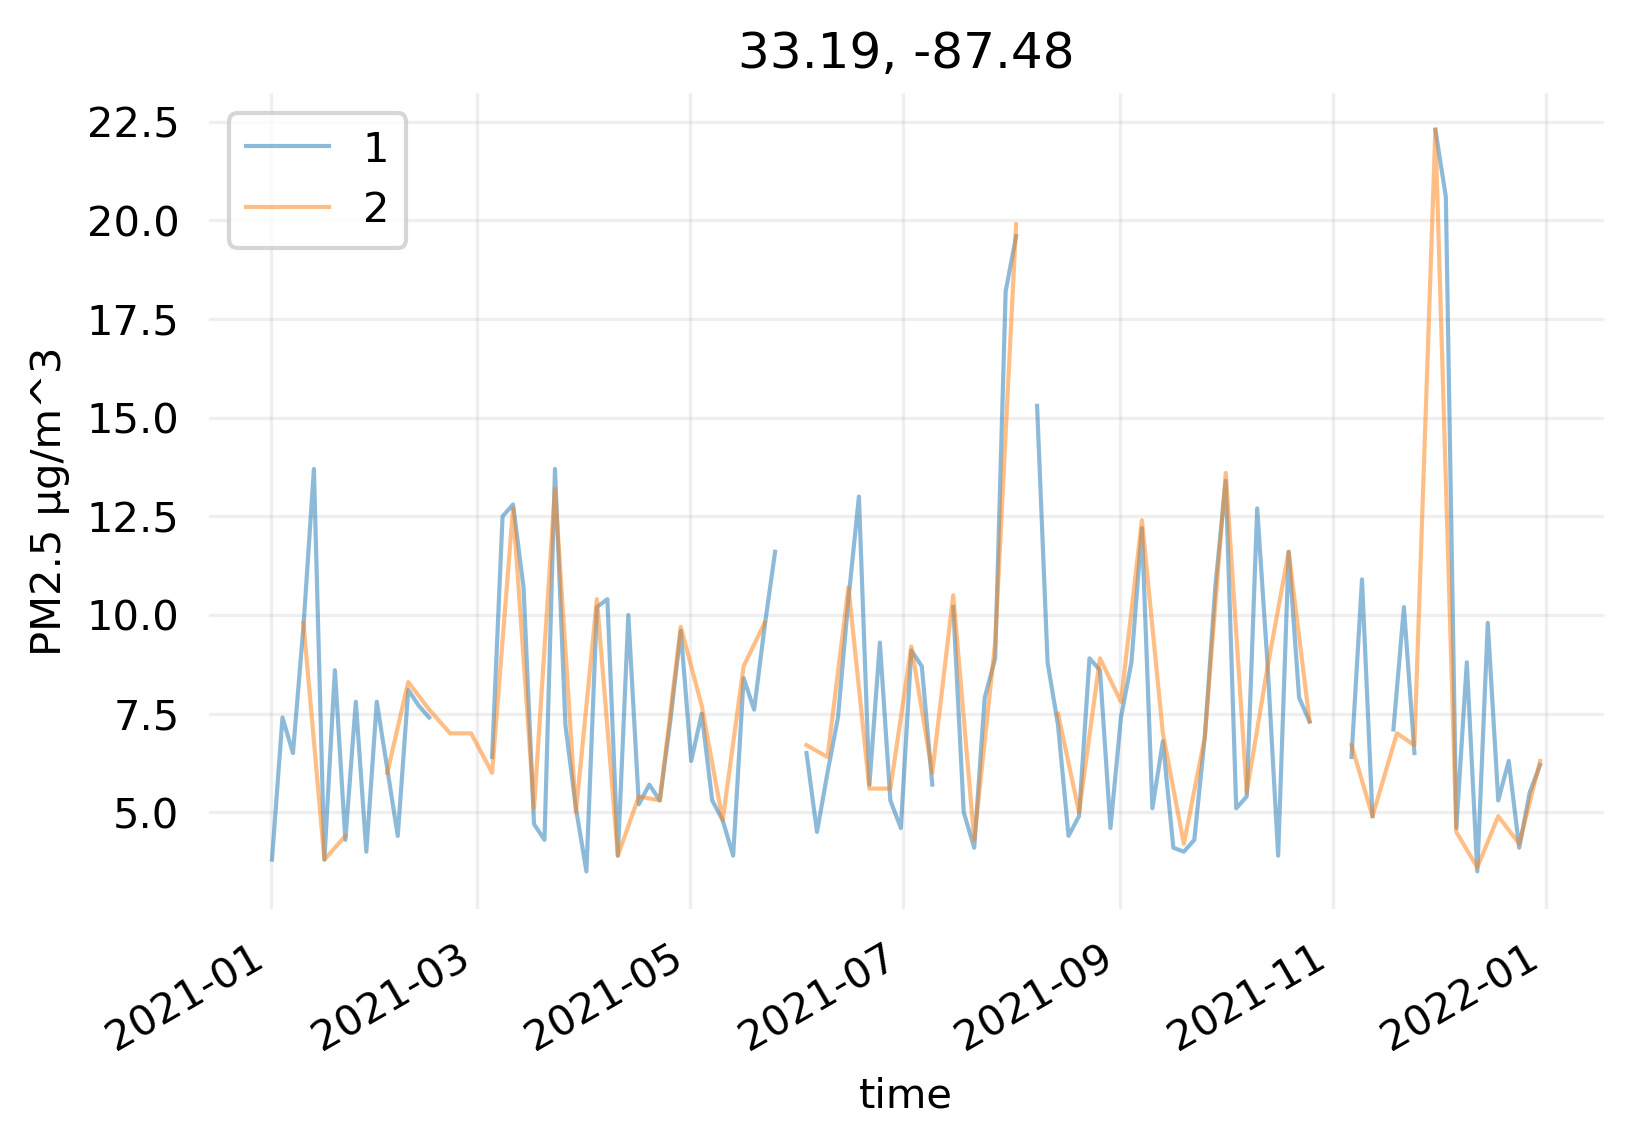

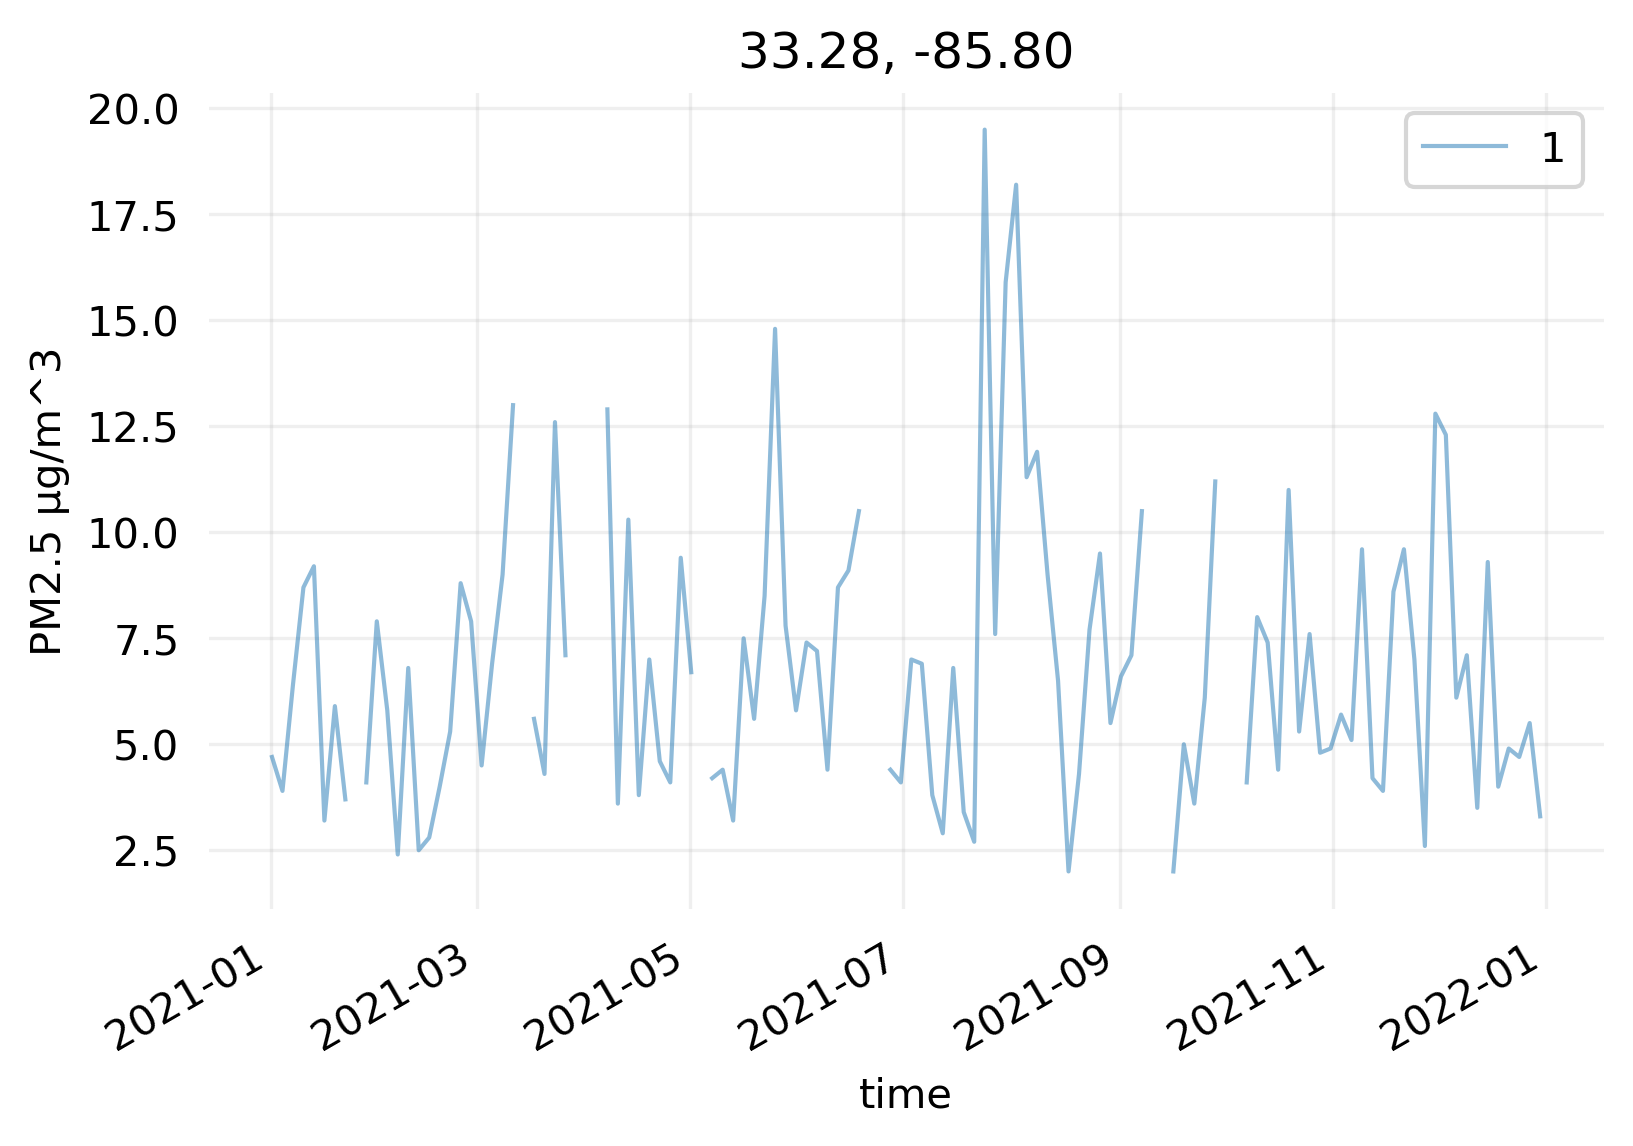

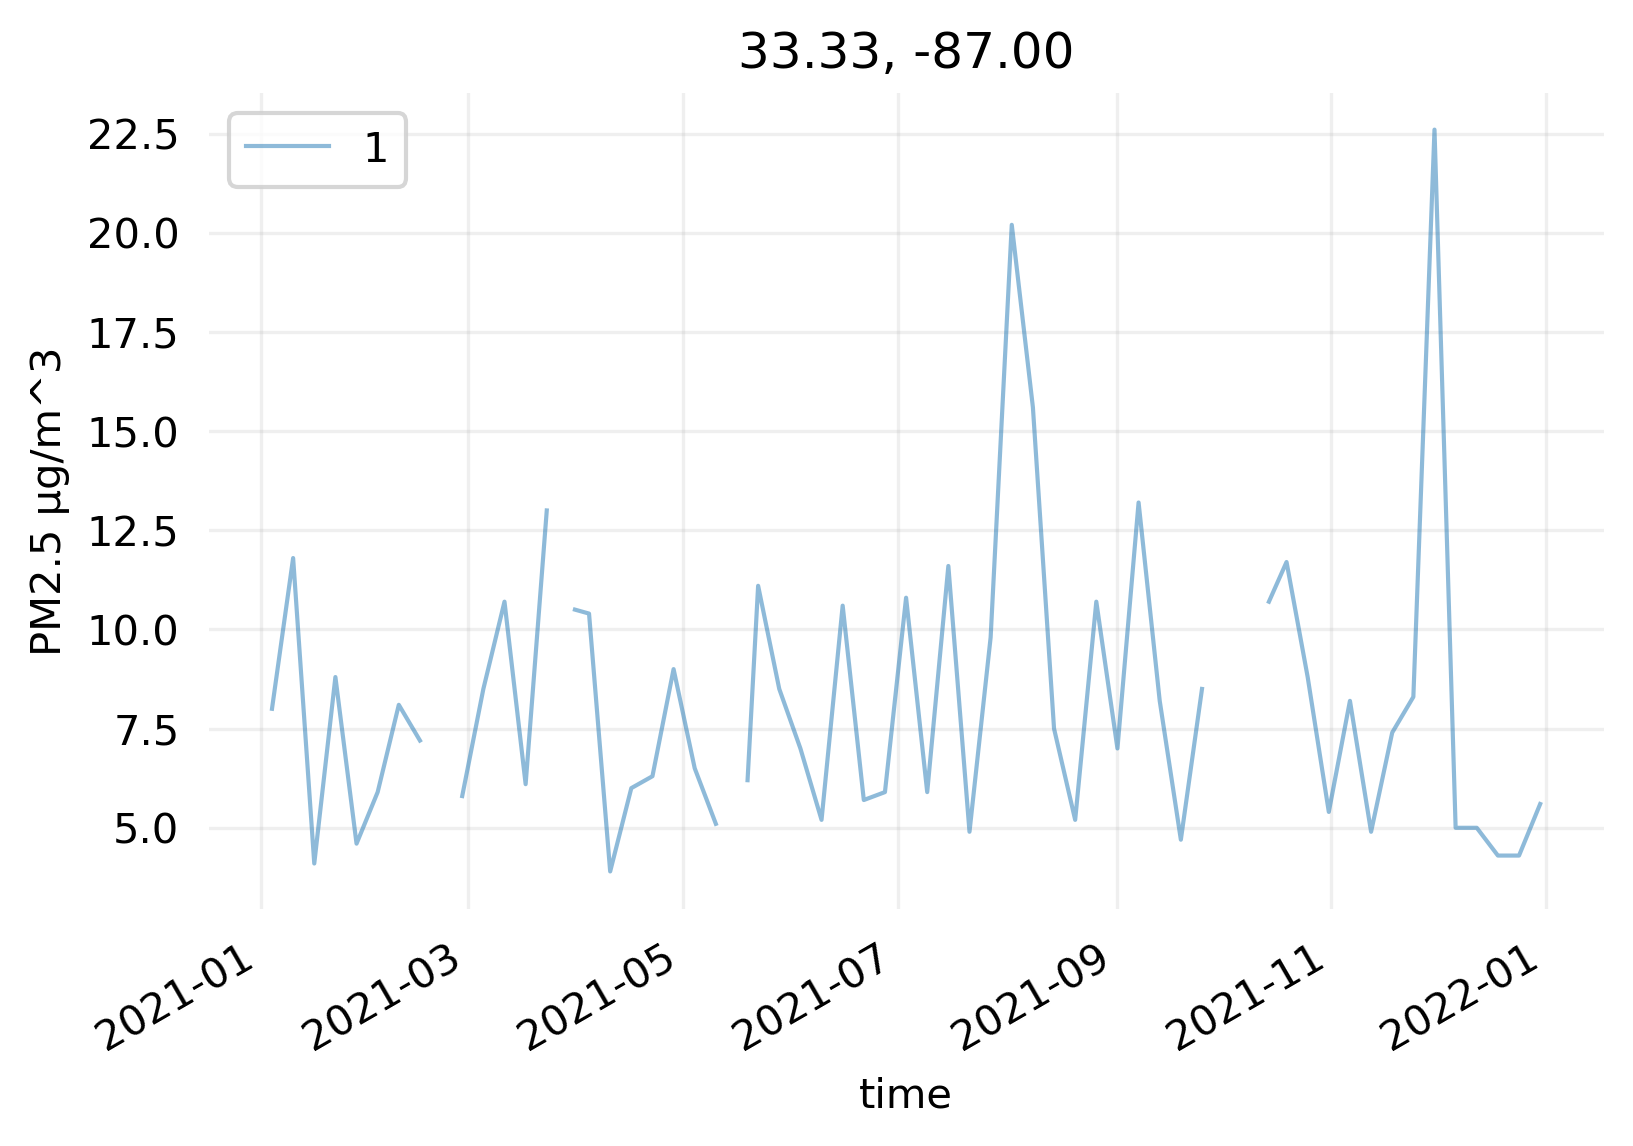

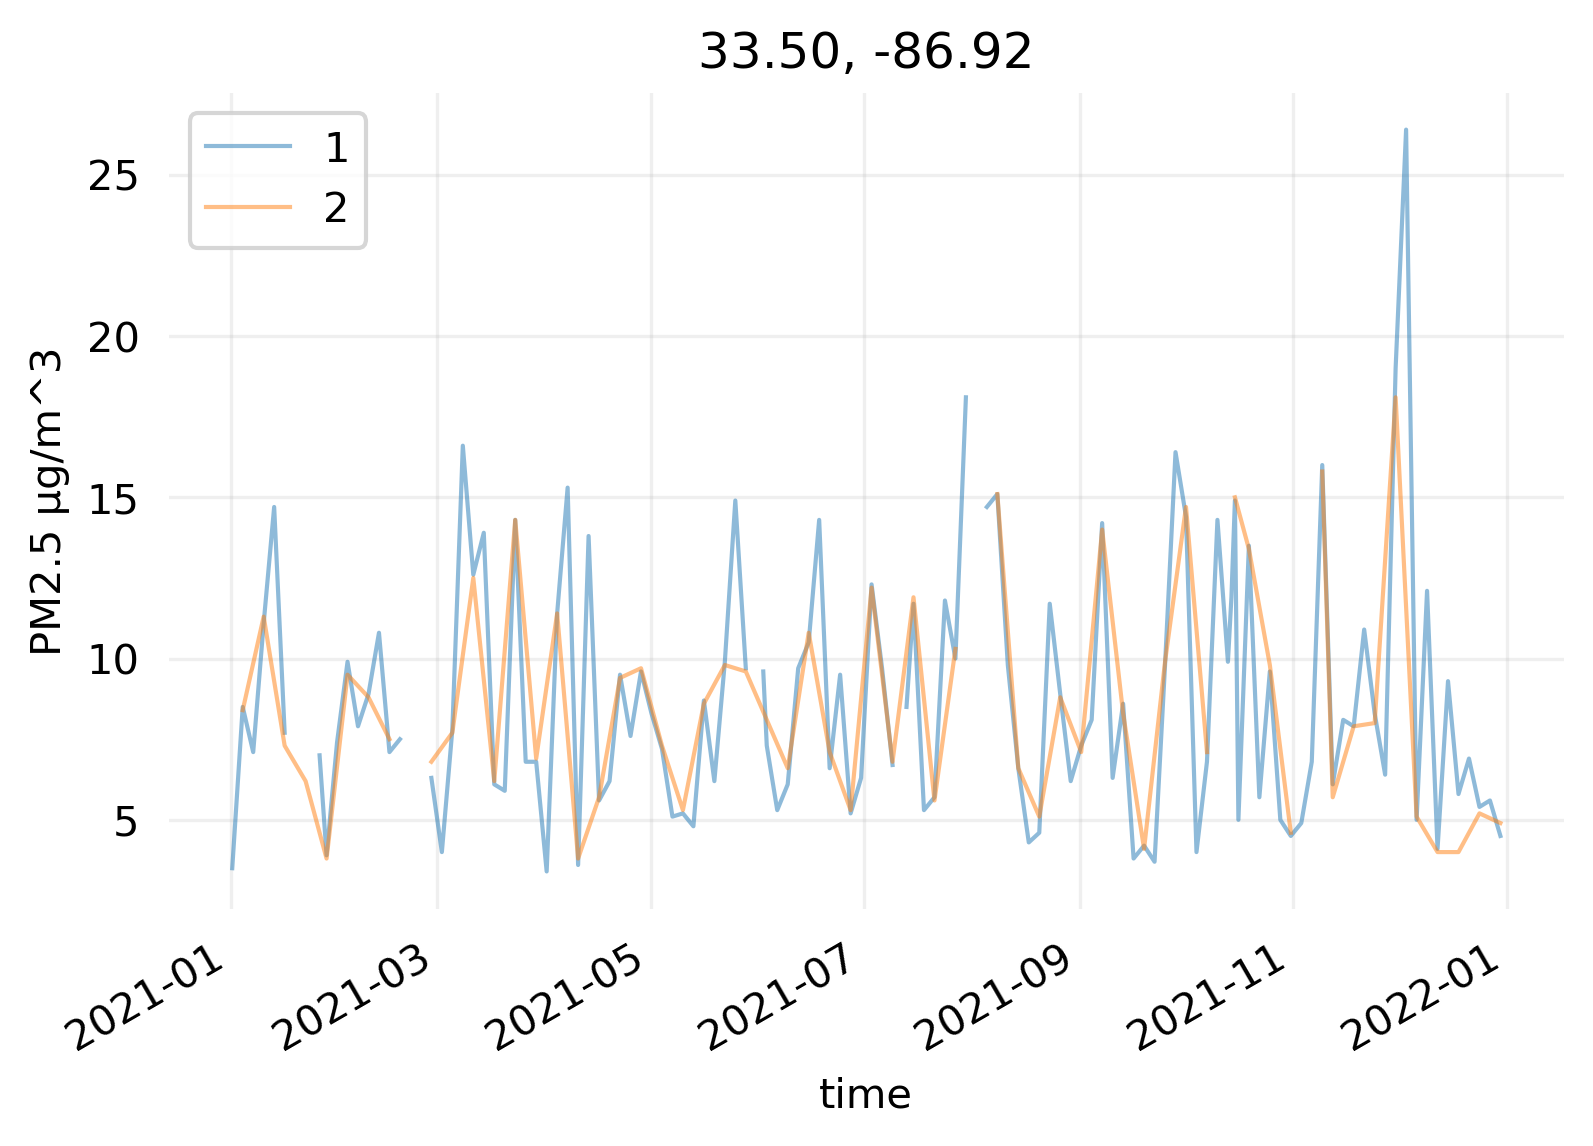

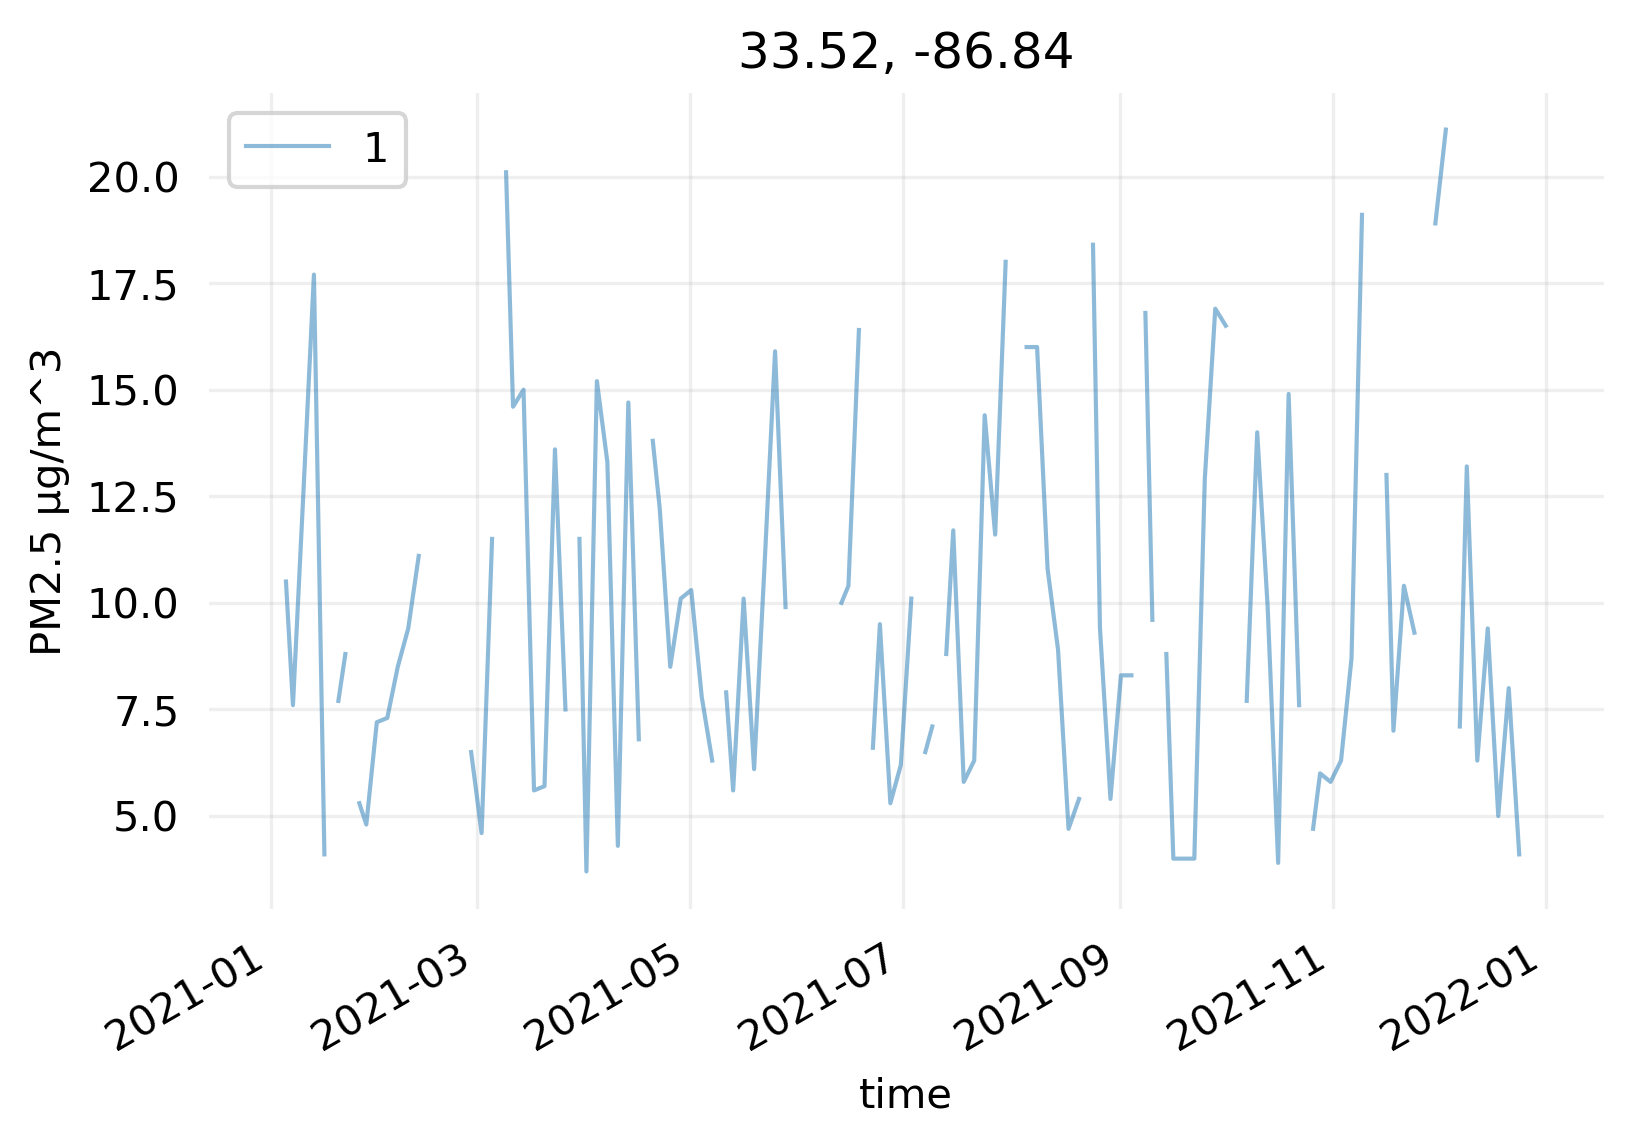

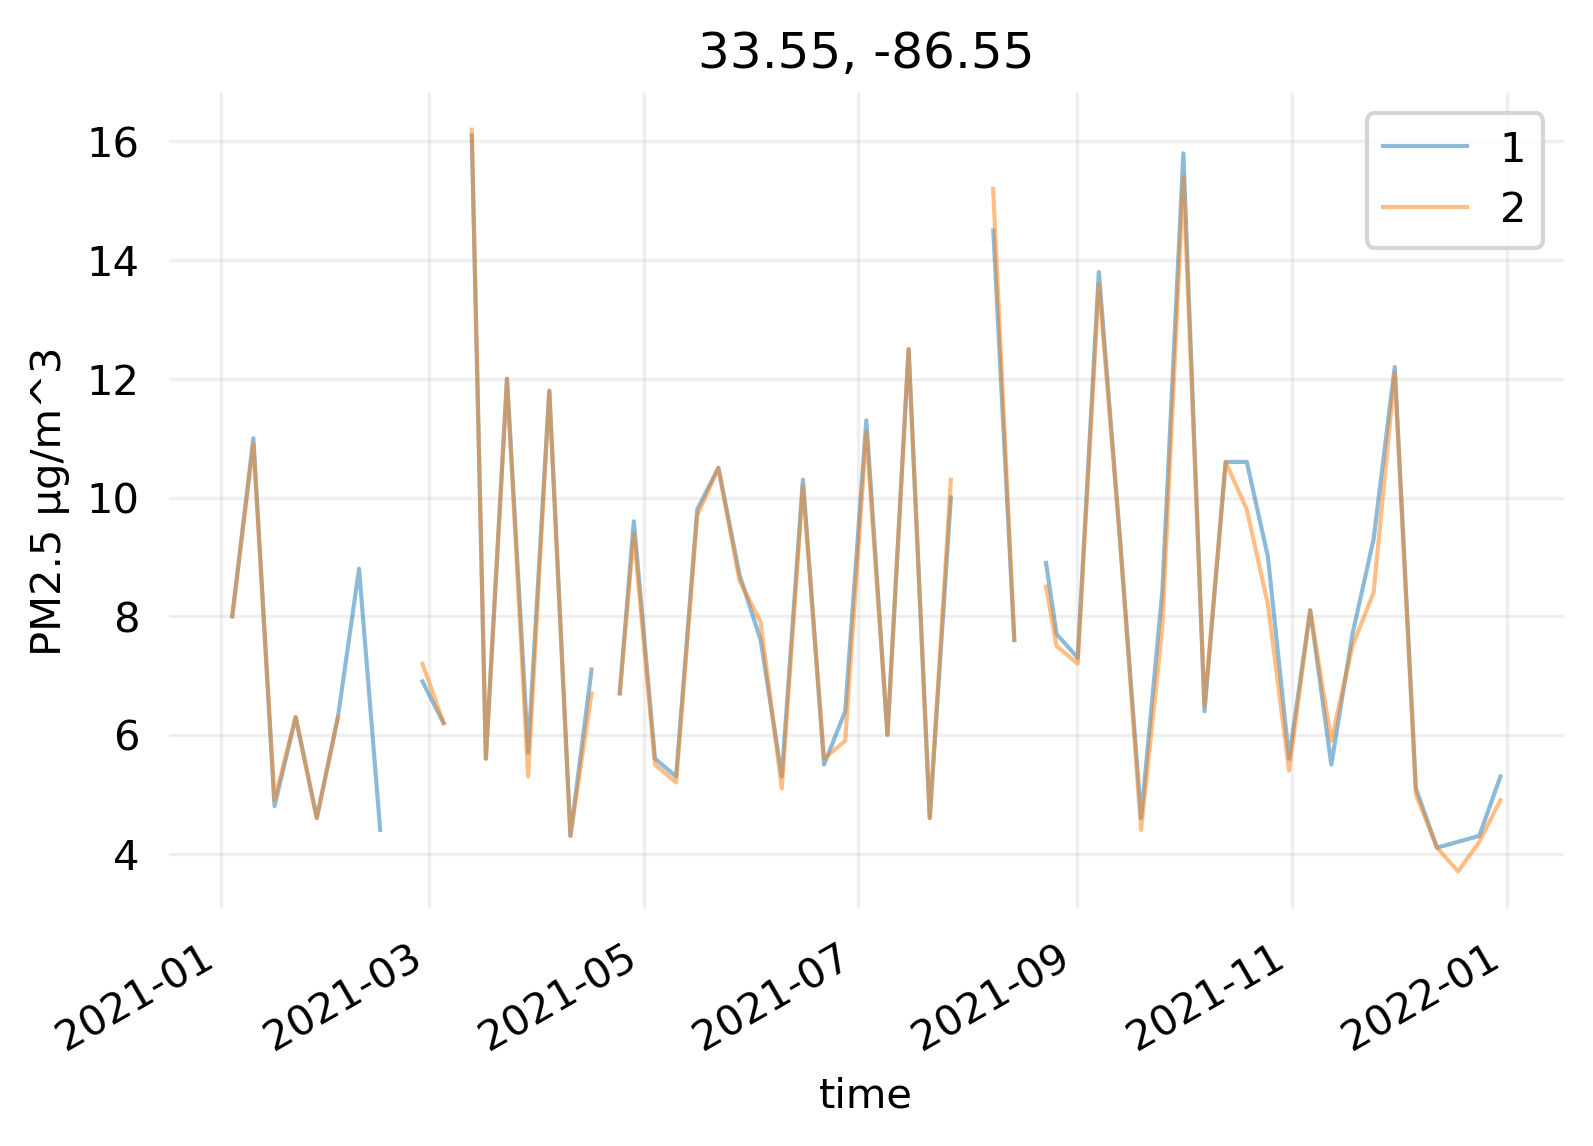

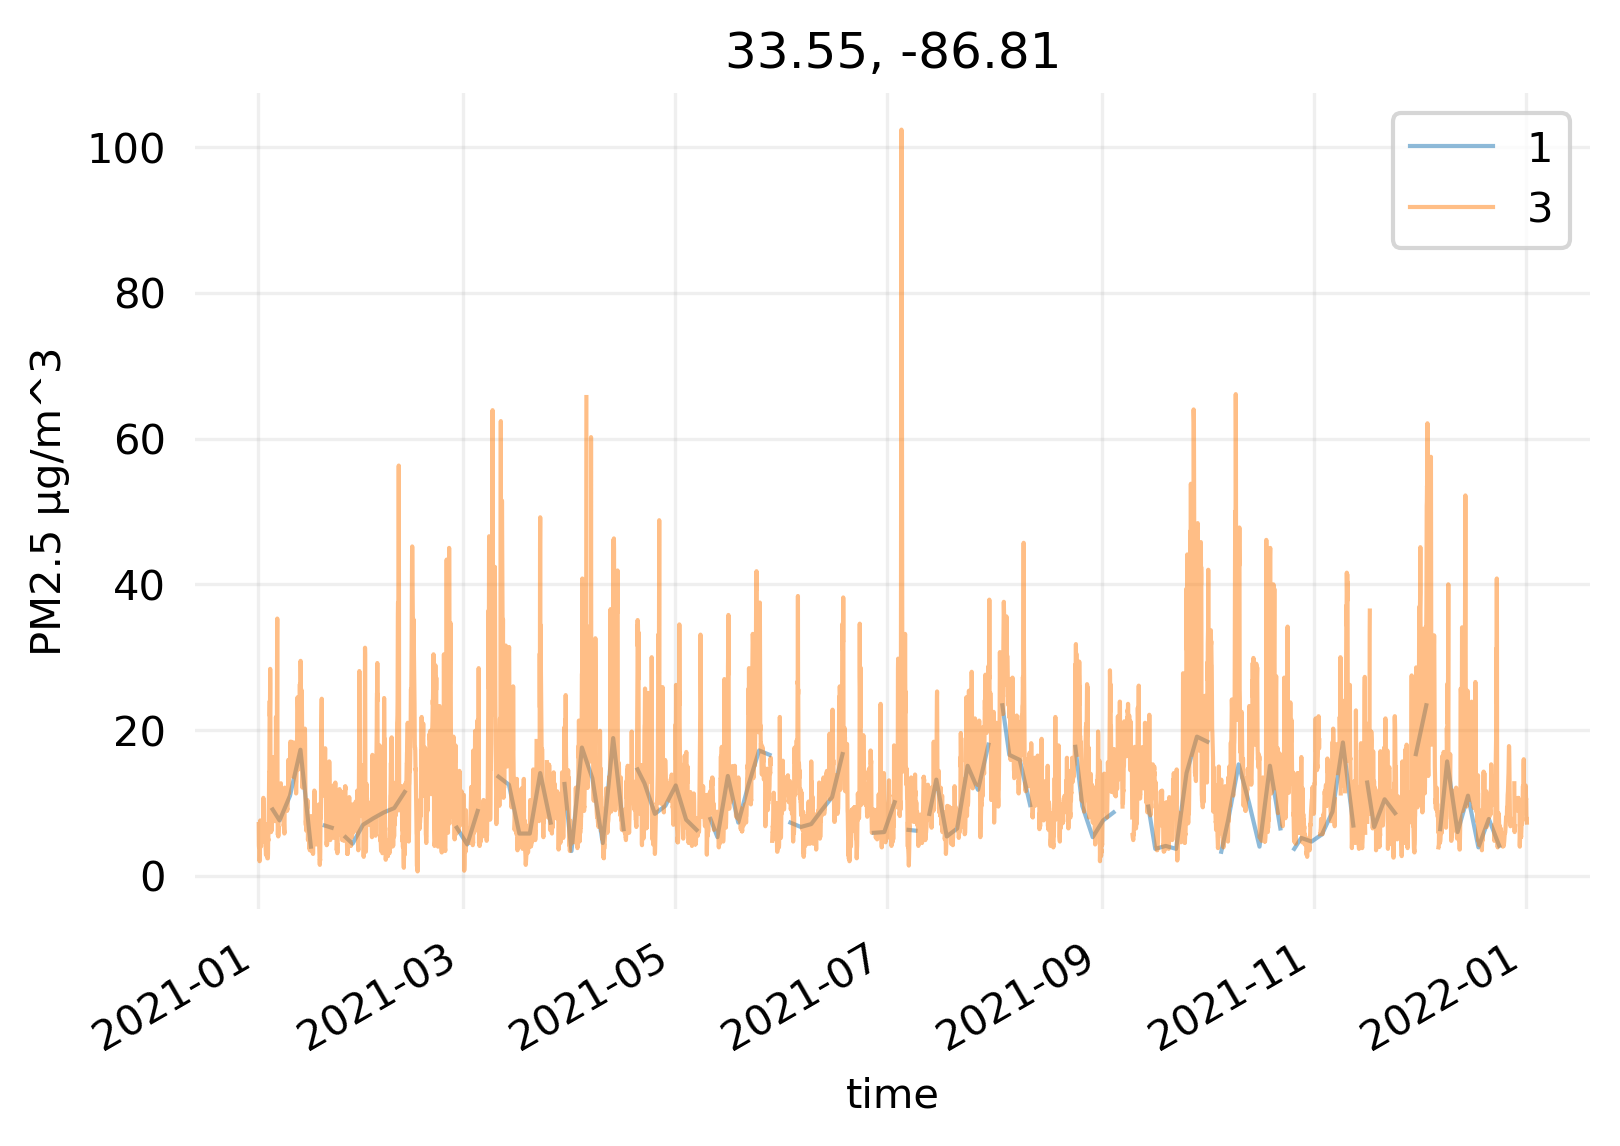

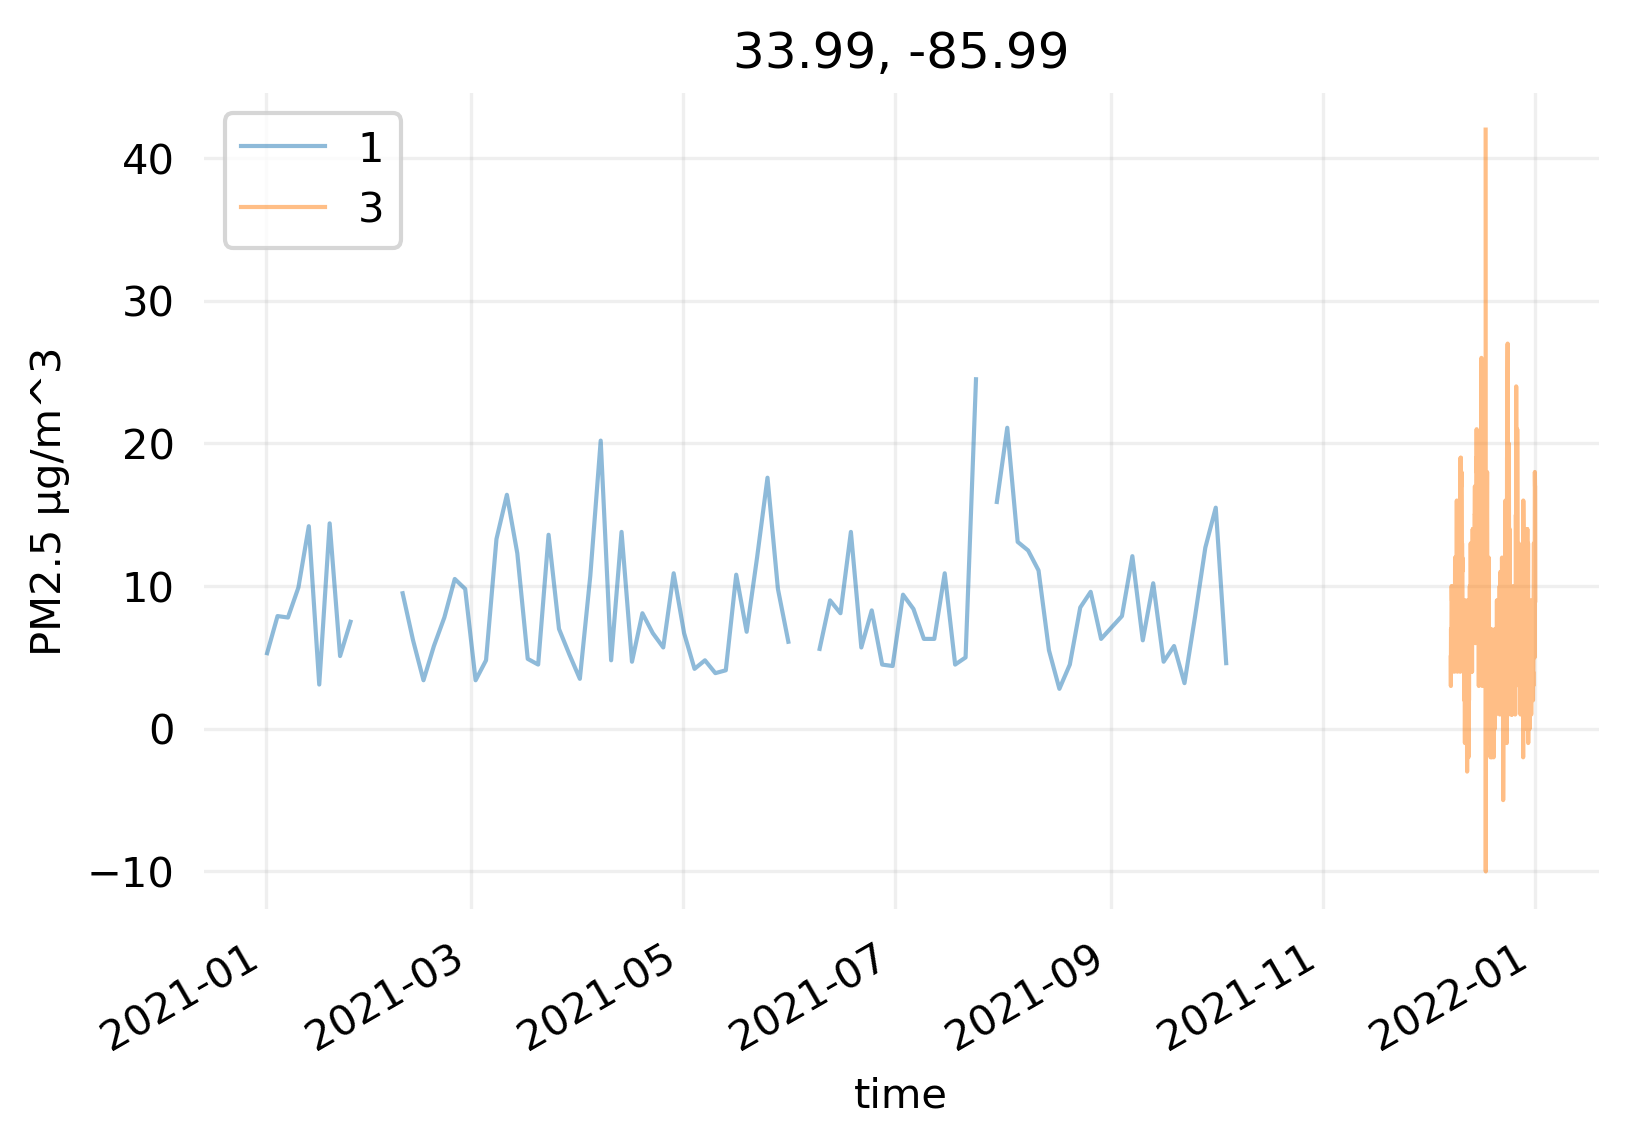

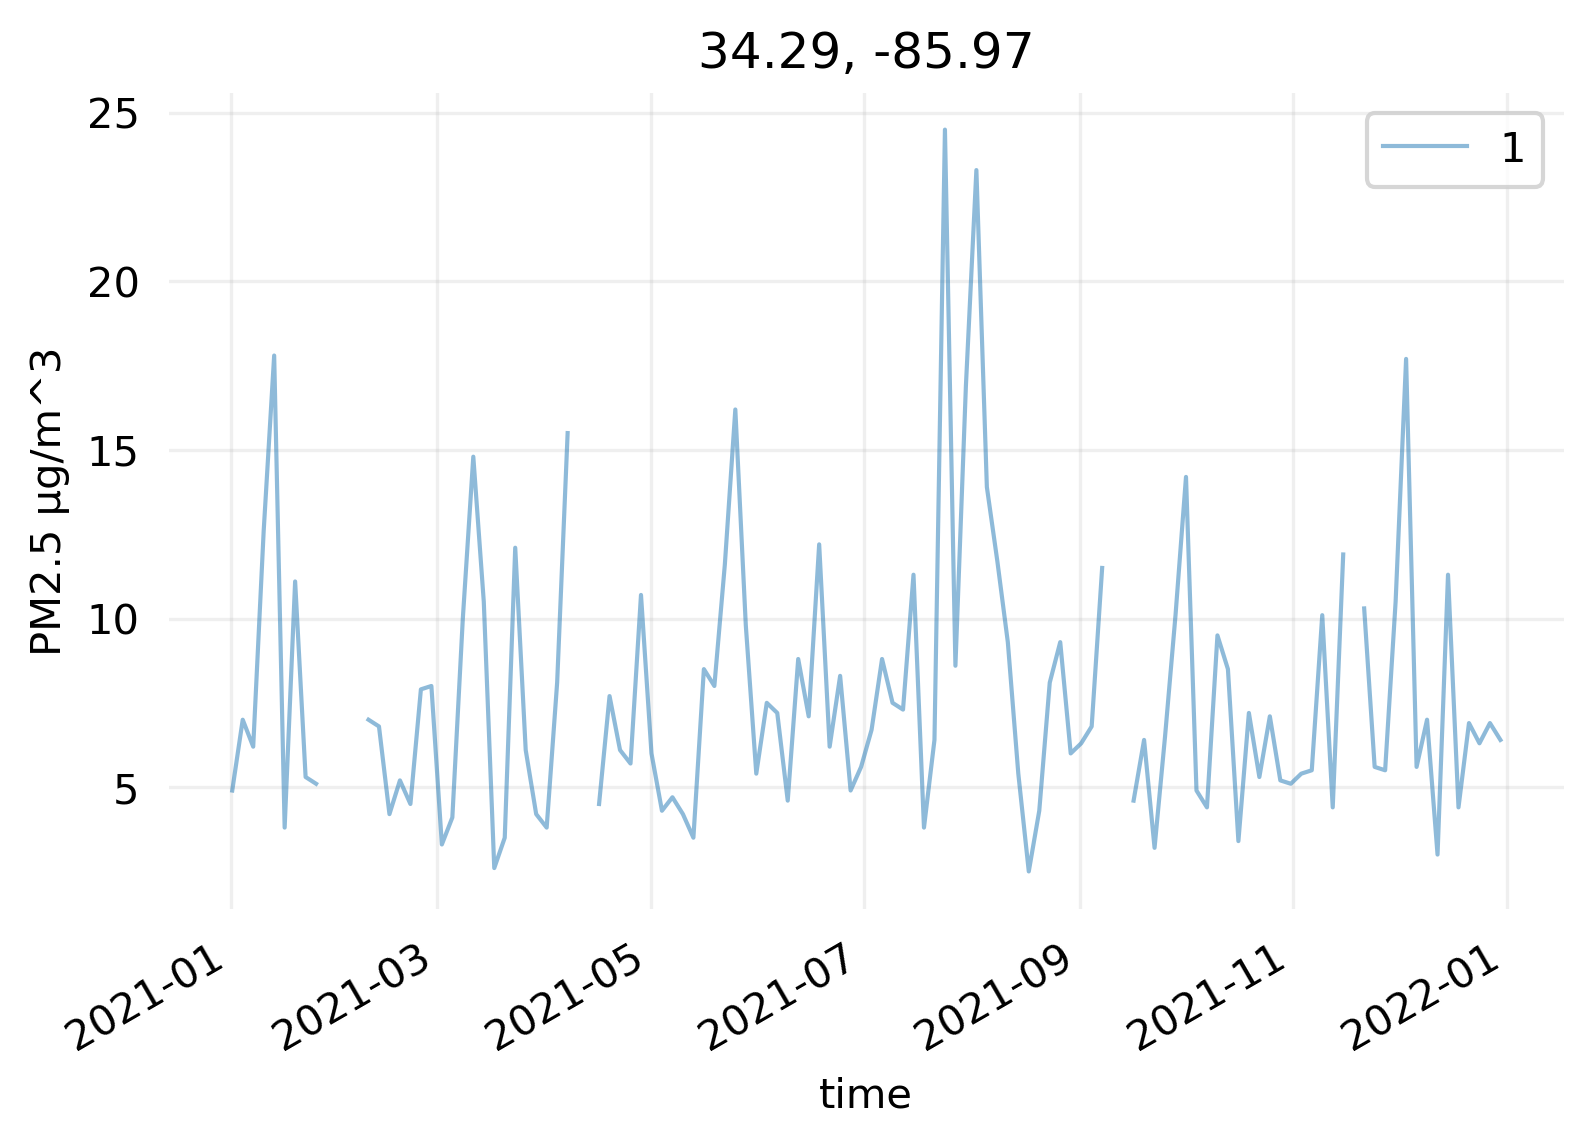

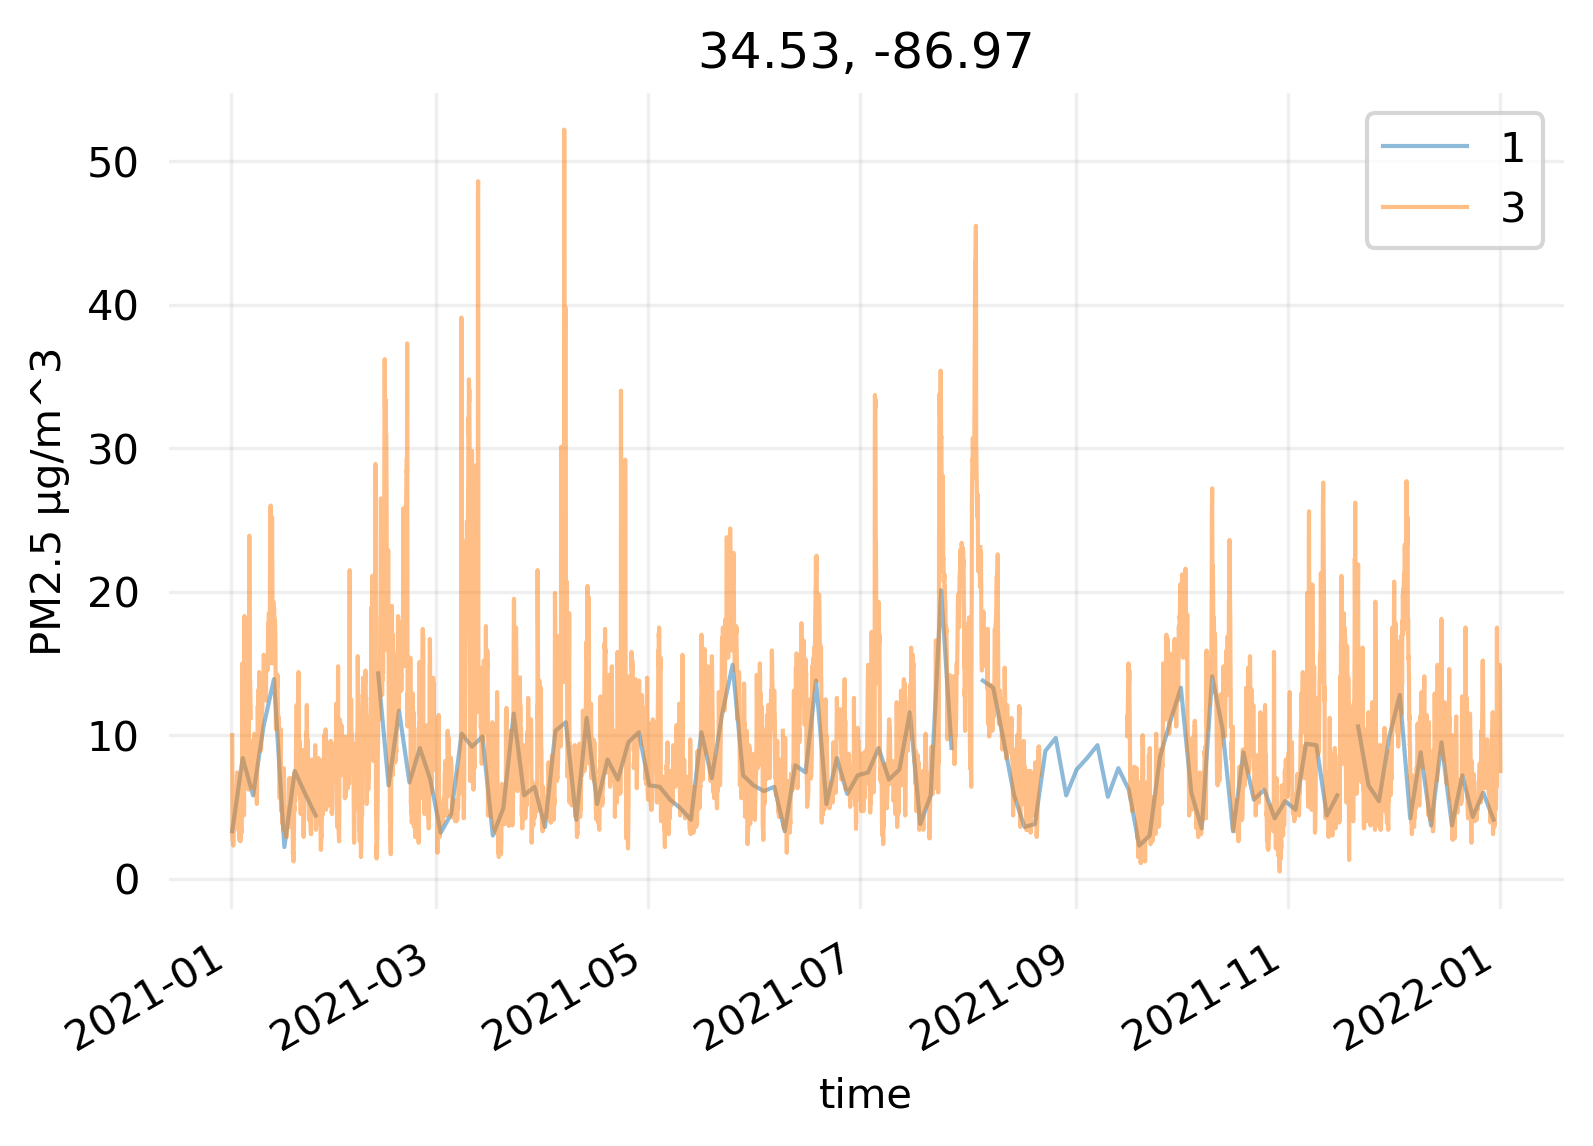

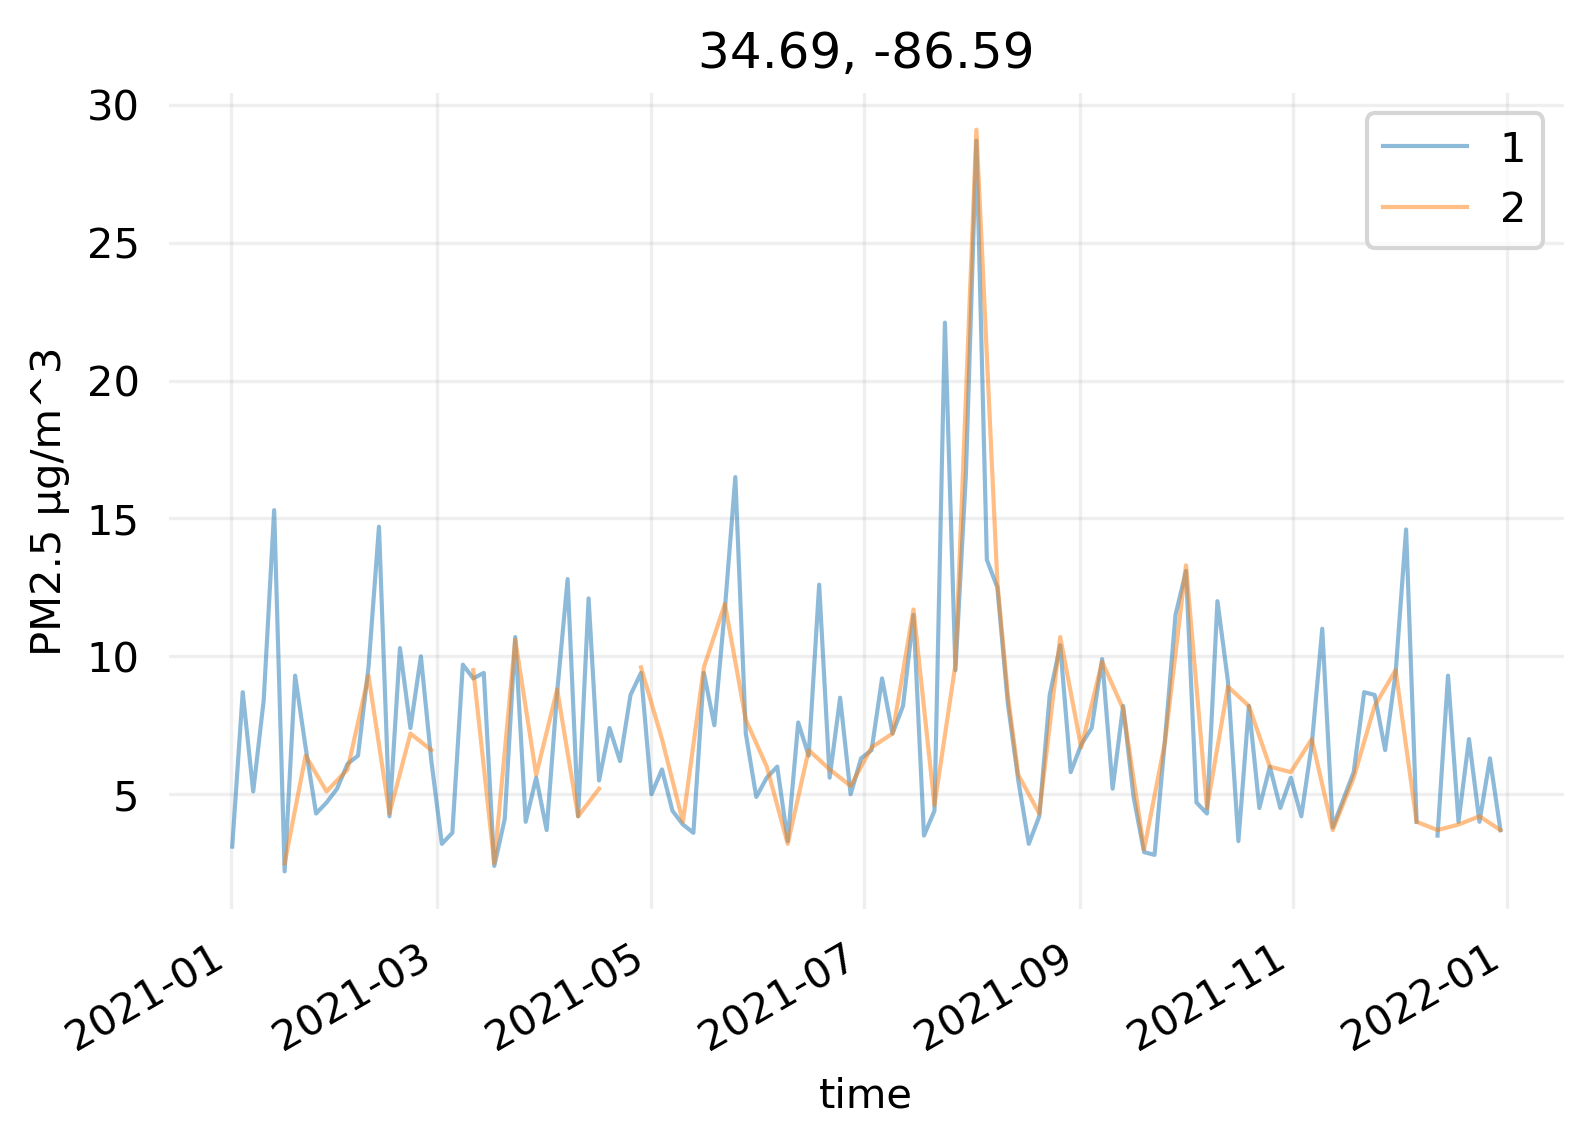

In [14]:
for (lat, lon), gdf in df.groupby(['latitude', 'longitude']):
    fig, ax = plt.subplots(dpi=300)
    
    gdf.set_index('time').groupby('poc')['sample_measurement'].plot(
        x='time', y='sample_measurement', title=f'{lat:.2f}, {lon:.2f}', ax=ax,
        lw=1, alpha=0.5, legend=True
    )
    
    ax.grid(alpha=0.2)
    ax.tick_params(width=0)
    ax.set_ylabel('PM2.5 µg/m^3')
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)